## Modelos Lineal múltiple

El archivo de datos **USA.txt** contiene datos demográficos, sociales y económicos de los $50$ estados de los Estados Unidos más el distrito de Columbia el año que Barack Obama ganó sus segundas elecciones presidenciales. Estos datos han sido recopilados de diversas fuentes como el United States Census Bureau, el Pew Research Center y el Bureau of Labor Statistics. Explicar la variable `obama` que representa el porcentaje de votos a Obama en esas elecciones para cada estado en función de la variable `grad_univ` que representa el porcentaje de graduados universitarios de cada estado, la variable `afro` que representa el porcentaje de afroamericanos de cada estado, la variable `hispanos` que representa el porcentaje de hispanohablantes de cada estado y la variable `blancos` que representa el porcentaje de personas para cada estado cuya tonalidad de piel es clara. Realizar los siguientes apartados:

1. Exploración inicial de la base de datos con las cinco variables seleccionadas (incluyendo el análisis de la correlación).
2. Ajustar el modelo de regresión lineal considerando todas las variables que estén correlacionadas con `obama` de entre las $4$ seleccionadas y explicar el método de Mínimos Cuadrados Ordinarios (MCO)
3. Interpretar y detallar los resultados obtenidos sobre las salidas de la estimación del modelo de regresión lineal múltiple.

Ahora, utilizando el mismo archivo de datos **USA.txt**, pero, considerando todas las variables que contiene dicho conjunto de datos, encontrar el mejor modelo de regresión lineal múltiple para explicar la variable `obama` en función del resto de variables excepto `estado`. Comparar sus métricas y realizar la diagnosis del modelo de regresión elegido. Es decir, tenéis que hacer los siguientes pasos:

4. Describir e implementar el proceso de automatización de búsqueda y selección del mejor modelo.
5. Realizar la diagnosis y validación del mejor modelo seleccionado en base al ajuste de los datos previo.

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [ ]:
df <- read.table("/data/USA.txt", header = TRUE)
df

estado,region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,⋯,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
Alabama,3,94.4,8.1,51.50,82.6,22.3,26.2,1.1,3.9,⋯,49,1,18,6,1,13.8,8.0,43464,38.36,9
Alaska,4,1.2,10.1,48.00,91.6,27.5,3.3,5.4,5.5,⋯,26,19,2,14,4,7.7,7.6,63648,40.81,3
Arizona,4,56.3,8.2,50.30,85.4,26.6,4.1,2.8,29.6,⋯,23,15,2,25,4,13.8,8.4,47044,44.59,11
Arkansas,3,56.0,7.9,50.90,83.3,19.8,15.4,1.2,6.4,⋯,53,16,10,5,0,14.4,7.6,39018,36.88,6
California,4,239.1,5.0,50.30,81.0,30.5,6.2,13.0,37.6,⋯,18,14,4,31,2,11.4,10.4,57020,60.24,55
Colorado,4,48.5,8.1,49.90,89.9,36.7,4.0,2.8,20.7,⋯,23,19,2,19,2,10.9,7.8,57255,51.49,9
Connecticut,1,738.1,6.0,51.30,89.0,36.2,10.1,3.8,13.4,⋯,9,13,4,43,1,14.2,8.3,64247,58.06,7
Delaware,3,460.8,8.5,51.60,87.7,28.5,21.4,3.2,8.2,⋯,15,18,14,27,0,14.4,7.2,48972,58.61,3
District of Columbia,3,9856.5,5.2,52.80,87.5,51.2,50.7,3.5,9.1,⋯,15,20,18,18,0,11.4,9.0,65246,90.91,3


In [ ]:
str(df)

'data.frame':	51 obs. of  21 variables:
 $ estado        : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ region        : int  3 4 4 3 4 4 1 3 3 3 ...
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ veteranos     : num  8.1 10.1 8.2 7.9 5 8.1 6 8.5 5.2 8.3 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 52.8 51.1 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 87.5 85.8 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro          : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 3.5 2.4 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos       : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 15 25 ...
 $ protestantes  : int  1 19 15 16 14 19 13 18 20 15 ...
 $ relig_afro    : int  18 2 2 10 4 2 4 14 18 8 ...
 $ catolicos     : int  6 14 25 5 31 19 43 27 18 2

**Contextualización de la base de datos**

La base de datos contiene **51 observaciones**, correspondientes a los **50 estados de EE. UU. y el Distrito de Columbia**, y **21 variables** que describen características **demográficas, educativas, socioeconómicas, religiosas y electorales** a nivel estatal. El nivel de agregación es **territorial (estado)**, por lo que todas las interpretaciones deben entenderse en términos **agregados**, no individuales.

- **Identificación y contexto geográfico**
  - `estado`: nombre del estado.
  - `region`: código numérico que identifica la región geográfica del país.

- **Estructura demográfica**
  - `densidad`: densidad de población.
  - `mujeres`: porcentaje de población femenina.
  - `jubilados`: porcentaje de población jubilada.
  - `veteranos`: porcentaje de población veterana.

- **Nivel educativo**
  - `grad_instituto`: porcentaje de población con estudios de secundaria.
  - `grad_univ`: porcentaje de población con estudios universitarios.

- **Composición racial y étnica**
  - `afro`: porcentaje de población afroamericana.
  - `asia`: porcentaje de población asiática.
  - `hispanos`: porcentaje de población hispana.
  - `blancos`: porcentaje de población blanca.

- **Afiliación religiosa**
  - `evangelicos`, `protestantes`, `relig_afro`, `catolicos`, `mormones`: porcentajes de población afiliada a distintos grupos religiosos, que capturan la diversidad confesional y posibles patrones culturales asociados al comportamiento político.

- **Situación económica y laboral**
  - `paro`: tasa de desempleo.
  - `salario`: salario medio.
  
- **Resultado electoral y representación**
  - `obama`: porcentaje de voto obtenido por Barack Obama, que actúa como **variable dependiente principal** en los análisis realizados.
  - `diputados`: número de representantes en la Cámara, relacionado con el tamaño poblacional del estado.

En conjunto, la base de datos proporciona un **marco multivariante rico** para analizar cómo factores educativos, demográficos, económicos y culturales se asocian con el **apoyo electoral a Barack Obama**. Dado que muchas variables describen proporciones de una misma población (por ejemplo, composición racial o religiosa), es esperable la presencia de **correlaciones y posibles problemas de colinealidad**, que deben considerarse en modelos de regresión e interpretaciones posteriores.


In [ ]:
zdata <- df[, c("obama", "grad_univ", "afro", "hispanos", "blancos")]
# Visualizamos la base de datos seleccionada
head(zdata)

,obama,grad_univ,afro,hispanos,blancos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38.36,22.3,26.2,3.9,67.0
2,40.81,27.5,3.3,5.5,64.1
3,44.59,26.6,4.1,29.6,57.8
4,36.88,19.8,15.4,6.4,74.5
5,60.24,30.5,6.2,37.6,40.1
6,51.49,36.7,4.0,20.7,70.0


In [ ]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata=na.omit(zdata)
# Podemos comprobar como NO existen datos missing
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 51

[1] 51

como se aprecia no hay datos faltantes

In [ ]:
str(zdata)

'data.frame':	51 obs. of  5 variables:
 $ obama    : num  38.4 40.8 44.6 36.9 60.2 ...
 $ grad_univ: num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro     : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ hispanos : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos  : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...


In [ ]:
# Realizamos el análisis exploratorio de las variables utilizadas
summary(wdata)

     obama         grad_univ          afro          hispanos        blancos    
 Min.   :24.75   Min.   :17.90   Min.   : 0.40   Min.   : 1.00   Min.   :22.7  
 1st Qu.:40.23   1st Qu.:24.70   1st Qu.: 3.10   1st Qu.: 3.05   1st Qu.:59.8  
 Median :50.67   Median :27.10   Median : 7.40   Median : 8.20   Median :74.5  
 Mean   :49.03   Mean   :28.23   Mean   :11.12   Mean   :10.21   Mean   :70.7  
 3rd Qu.:56.22   3rd Qu.:30.95   3rd Qu.:15.65   3rd Qu.:12.05   3rd Qu.:82.6  
 Max.   :90.91   Max.   :51.20   Max.   :50.70   Max.   :46.30   Max.   :94.4  

In [ ]:
# Cargar librería necesaria para kurtosis
if(!require(moments, quietly = TRUE)){
  install.packages("moments", repos = "https://cloud.r-project.org")
  library(moments)
}

# Desviación estándar de todas las variables numéricas
sapply(wdata, sd, na.rm = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



obama grad_univ      afro  hispanos   blancos 
11.810936  5.788205 11.021240 10.094712 16.167659

In [ ]:
# Curtosis de todas las variables numéricas
sapply(wdata, kurtosis, na.rm = TRUE)

obama grad_univ      afro  hispanos   blancos 
 4.619580  6.252674  5.048473  6.177634  3.325084

**<u>Interpretación resultados</u>.-**

La base de datos contiene información de **18 equipos profesionales de e-sports** y cinco variables de las cuales cuatro cuantitativas que describen su rendimiento competitivo y su volumen de entrenamiento, sin presencia de valores atípicos ni registros anómalos. A continuación se interpretan los estadísticos descriptivos de cada variable en su contexto.

**Equipo** actúa como identificador único, con 18 equipos diferentes incluidos en el análisis.

**Win_rate** recoge el porcentaje de victorias de cada equipo durante la última temporada. Presenta valores entre 48.8 % y 74.4 %, con una media aproximada del 60.5 % y una mediana ligeramente menor (59.15 %). La desviación estándar (~ 8.51 pp) indica una dispersión moderada: existen diferencias apreciables entre equipos más y menos consistentes. Su curtosis (~ 1.69) sugiere una distribución con valores concentrados en un rango relativamente homogéneo. En términos competitivos, los equipos muestran variabilidad en desempeño, aunque sin extremos de dominio absoluto ni bajo rendimiento crítico.

**KDA** mide el equilibrio entre eliminaciones/asistencias y muertes. Se sitúa entre 1.54 y 4.40, con media de 3.30 y mediana de 3.44, lo que apunta a una distribución bastante simétrica. La desviación estándar (~ 0.88) refleja diferencias moderadas en eficiencia durante las partidas. La curtosis (~ 2.19) indica que la distribución es ligeramente platicúrtica, sin colas pesadas. En términos de juego, los equipos muestran distintos estilos y niveles de eficacia mecánica, pero sin valores extremadamente bajos ni excepcionalmente altos.

**Control_obj**, porcentaje de control de objetivos del mapa, presenta el rango más amplio del conjunto (30.1 %–78.4 %). La media (55.1 %) y la mediana (53.55 %) sugieren un desempeño medio-alto en la mayoría de equipos. Sin embargo, la desviación estándar (~ 14.85) evidencia alta heterogeneidad: algunos equipos dominan con claridad los objetivos, mientras que otros tienen dificultades para competir en esta faceta táctica. Su curtosis (~ 1.77) confirma la ausencia de colas marcadas y apunta a una distribución más aplanada que la normal.

Por último, **Entreno_horas**, las horas semanales de entrenamiento conjunto, oscila entre 18 y 40 h. La media (28.7 h) y la mediana (30.5 h) indican que la mayoría de equipos se sitúan alrededor de las 30 h semanales. La desviación estándar (~ 6.24 h) revela diferencias notables en la carga de trabajo, posiblemente asociadas a filosofías de entrenamiento o disponibilidad de recursos. Su curtosis (~ 2.22) muestra de nuevo una distribución relativamente plana sin valores extremos.

En conjunto, las variables presentan **variabilidad moderada y ausencia de valores extremos**, lo que indica un comportamiento estadístico estable en el que todos los equipos se sitúan en rangos razonables de rendimiento y dedicación. Esto proporciona una base adecuada para aplicar métodos de clustering, ya que las diferencias observadas pueden ayudar a identificar perfiles competitivos diferenciados sin verse distorsionados por outliers.


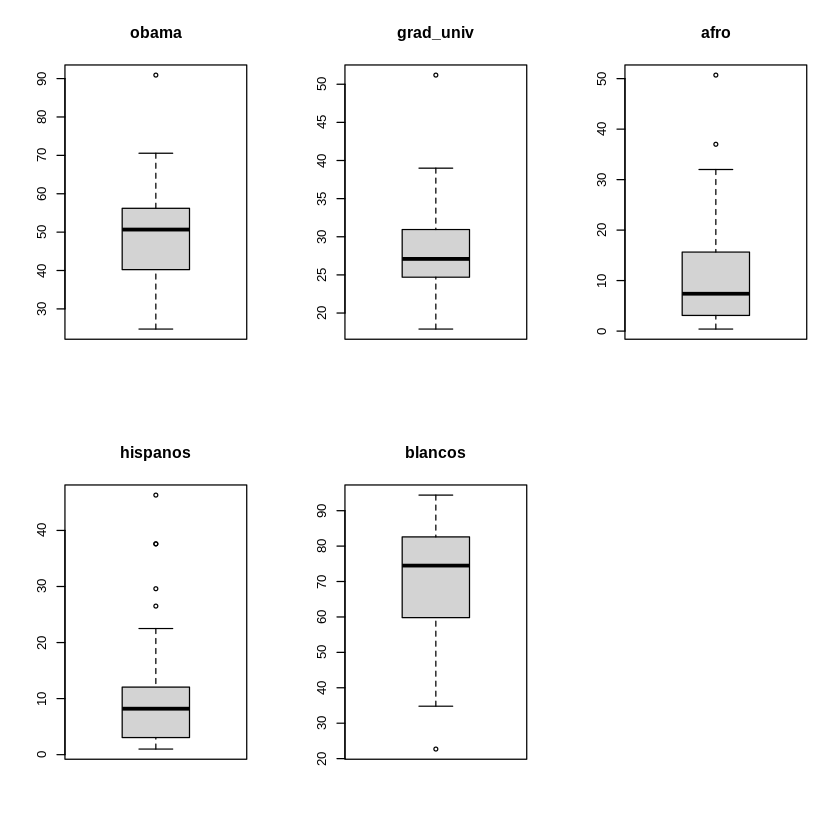

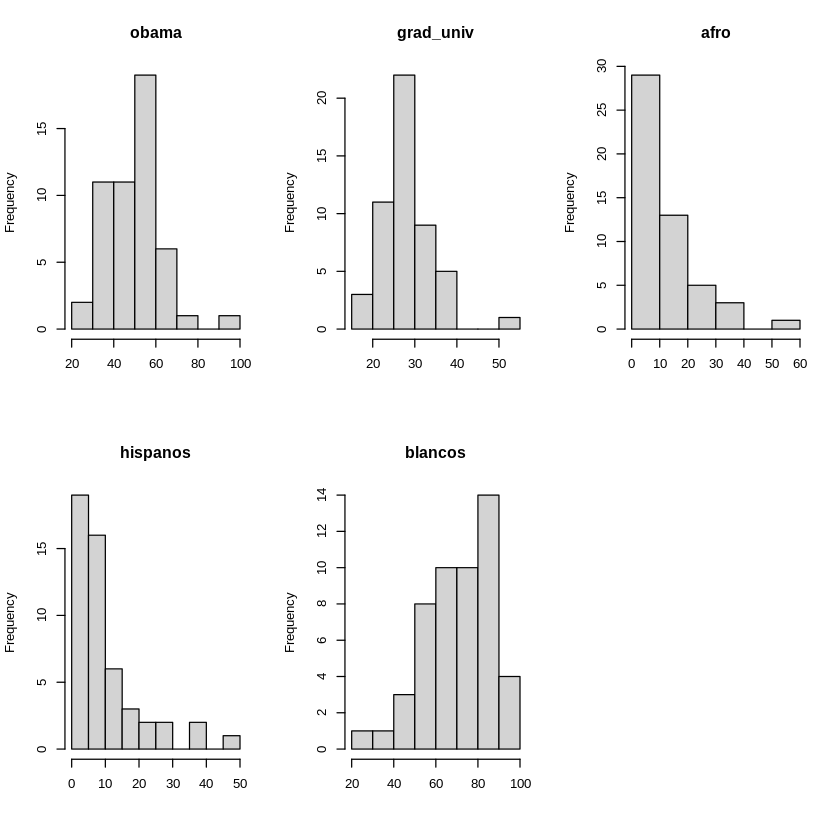

In [ ]:
# Seleccionar solo las variables numéricas
numeric_vars <- wdata[, sapply(wdata, is.numeric)]

# ---------- BOXPLOTS AUTOMÁTICOS ----------
par(mfrow = c(2, ceiling(ncol(numeric_vars)/2)))
for(i in 1:ncol(numeric_vars)){
  boxplot(numeric_vars[, i], main = colnames(numeric_vars)[i])
}

# ---------- HISTOGRAMAS AUTOMÁTICOS ----------
par(mfrow = c(2, ceiling(ncol(numeric_vars)/2)))
for(i in 1:ncol(numeric_vars)){
  hist(numeric_vars[, i], main = colnames(numeric_vars)[i], xlab = "")
}

# Volver a la configuración normal
par(mfrow = c(1,1))


**<u>Interpretación resultados</u>.–**

Los **boxplots** y **histogramas** permiten analizar de forma conjunta la **distribución**, **dispersión** y **forma** de las variables electorales y socio-demográficas: *obama*, *grad_univ*, *afro*, *hispanos* y *blancos*. Este análisis gráfico complementa los estadísticos descriptivos y facilita la identificación de patrones estructurales entre territorios.

**Comparación de dispersión y presencia de valores extremos**

A partir de los **boxplots**, se observa una **heterogeneidad marcada entre variables**:

- **`obama`** presenta una dispersión moderada-alta, con algunos valores atípicos en la parte superior, correspondientes a territorios con apoyos excepcionalmente elevados al candidato. Esto refleja la existencia de bastiones electorales claros frente a territorios más competitivos.
- **`grad_univ`** muestra una dispersión más contenida, aunque con presencia de valores altos atípicos, indicando territorios con niveles educativos notablemente superiores a la media.
- **`afro`** y **`hispanos`** son las variables con **mayor asimetría y número de outliers**, especialmente hacia valores altos. Esto evidencia que, aunque la mayoría de territorios tienen una presencia reducida de estos grupos, existen áreas con concentraciones muy elevadas.
- **`blancos`** presenta una dispersión amplia pero más equilibrada, con la mayoría de observaciones concentradas en valores altos y algunos territorios con composiciones raciales significativamente más diversas.

**Comparación de la forma de las distribuciones**

Los **histogramas** refuerzan estas observaciones:

- **`obama`** presenta una distribución relativamente centrada en valores intermedios, con ligera asimetría y una cola hacia valores altos, coherente con la presencia de territorios fuertemente favorables.
- **`grad_univ`** muestra una distribución unimodal y claramente concentrada en niveles educativos medios, con una cola derecha asociada a territorios altamente formados.
- **`afro`** y **`hispanos`** exhiben distribuciones fuertemente asimétricas a la derecha, con gran acumulación de observaciones en valores bajos y colas largas hacia valores altos, reflejando una distribución territorial muy desigual de estos grupos.
- **`blancos`** presenta una distribución más simétrica en comparación, aunque sesgada hacia valores altos, indicando que la mayoría de territorios tienen una población mayoritariamente blanca.

**Conclusión**

En conjunto, los gráficos revelan que las variables demográficas presentan **estructuras muy distintas**: mientras que el nivel educativo y el apoyo electoral muestran variabilidad moderada, las variables raciales —especialmente *afro* y *hispanos*— presentan **alta asimetría y valores extremos**, reflejo de la diversidad territorial del contexto analizado. Estas diferencias estructurales son clave para interpretar correctamente análisis posteriores, como modelos explicativos del voto o técnicas de clustering, y aconsejan cautela ante posibles problemas de **asimetría, colinealidad y sensibilidad a outliers**.


Antes de proceder con la estimación del modelo de lineal entre las variables de interés,
es necesario comprobar que existe una relación significativa entre ellas.
Si no se cumple esta condición, no sería adecuado aplicar técnicas de regresión,
ya que el modelo carecería de validez explicativa.  

Para llevar a cabo esta verificación se considerarán tres enfoques complementarios:

1. **Evidencia gráfica**: análisis visual de la relación entre las variables mediante representaciones gráficas.  
2. **Evidencia estadística**: contraste formal de hipótesis que evalúe la existencia y significación de la relación.  
3. **Evidencia numérica**: estudio de indicadores descriptivos que permitan cuantificar la fuerza y dirección de la asociación.  

**Evidencia Gráfica**
El análisis gráfico es una herramienta fundamental para explorar la relación entre las
variables del modelo. En particular, el gráfico de dispersión (scatter plot) permite
visualizar la forma y la intensidad de la relación entre la variable dependiente
y cada una de las variables independientes.

Este tipo de representación facilita la detección de:
- Patrones de asociación (positivos, negativos o nulos).
- Relación lineal o no lineal.
- Posibles outliers.
- Estructuras no esperadas que podrían afectar al ajuste del modelo.

El gráfico de dispersión es especialmente útil para validar visualmente las supo-
siciones iniciales sobre la naturaleza de las relaciones entre las variables.

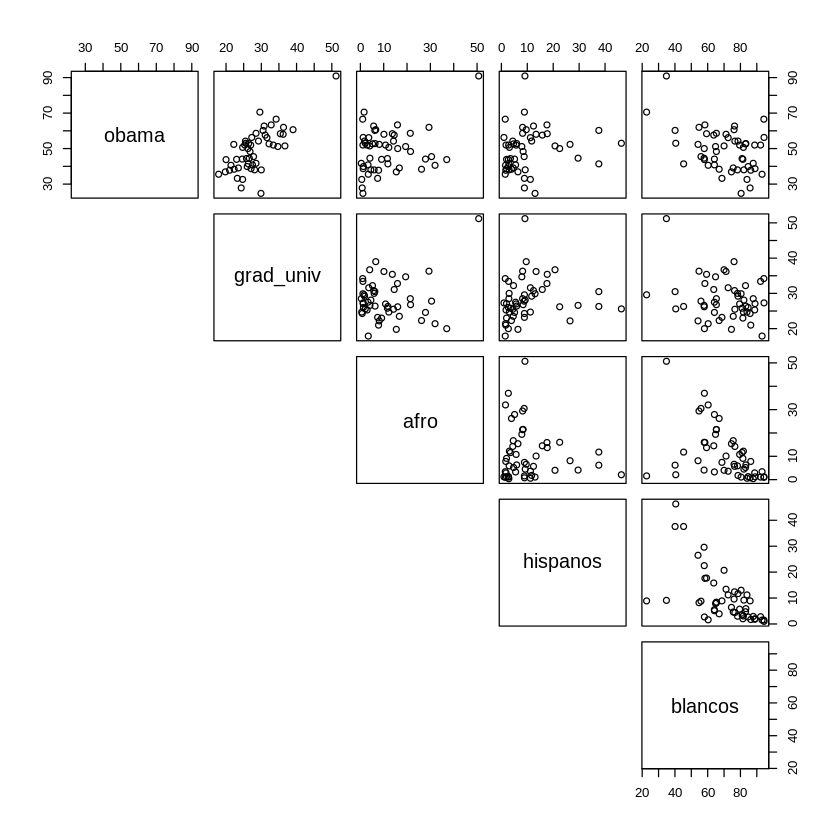

In [ ]:
# Evidencia gráfica a través del gráfico de dispersión
pairs(wdata, lower.panel = NULL)

**<u>Interpretación resultados</u>.-** En los gráficos de dispersión muestra que **los puntos no se distribuyen de manera aleatoria en todo el plano**.
  
Este comportamiento constituye una primera evidencia de que podría existir una relación entre las variables analizadas.  

No obstante, la evidencia gráfica por sí sola no es concluyente;
será necesario complementar este análisis con medidas numéricas y contrastes estadísticos
para confirmar la existencia y la naturaleza de dicha relación.


**Evidencia Numérica**
El **coeficiente de correlación de Pearson** es una medida estadística que permite
cuantificar la fuerza y la dirección de la relación lineal entre dos variables. Este
indicador proporciona una valoración numérica que complementa la evidencia gráfica y
ayuda a confirmar si existe una relación significativa entre las variables analizadas.
El coeficiente de Pearson toma valores en el rango de [−1, 1]:

- Un **valor cercano a 1** indica una **correlación positiva fuerte**, es decir, a medida
que una variable aumenta, la otra también aumenta.

- Un **valor cercano a -1** indica una **correlación negativa fuerte**, es decir, cuando
una variable aumenta, la otra disminuye.

- Un **valor cercano a 0** sugiere una **ausencia de relación lineal significativa** entre
las variables.

El análisis del coeficiente de correlación permite obtener evidencia numérica objetiva
sobre la existencia y la intensidad de las relaciones observadas, apoyando la interpretación
visual obtenida a partir de los gráficos de dispersión.

In [ ]:
# Evidencia numérica
cor(wdata)

,obama,grad_univ,afro,hispanos,blancos
obama,1.0000000,0.7154854,0.2834353,0.1601314,-0.4292205
grad_univ,0.7154854,1.0000000,0.1689640,0.1282210,-0.2450445
afro,0.2834353,0.1689640,1.0000000,-0.1083742,-0.4799778
hispanos,0.1601314,0.1282210,-0.1083742,1.0000000,-0.6126307
blancos,-0.4292205,-0.2450445,-0.4799778,-0.6126307,1.0000000


**<u>Interpretación resultados</u>.-**

El análisis de la **matriz de correlaciones** permite evaluar la intensidad y el sentido de las relaciones lineales entre el apoyo electoral a Barack Obama (`obama`) y las variables socio-demográficas consideradas, así como las interrelaciones entre estas últimas.

La relación más fuerte se observa entre **`obama` y `grad_univ`**, con un coeficiente de **0.7155**, lo que indica una **correlación positiva alta**. Este resultado sugiere que los territorios con mayor proporción de población con estudios universitarios tienden a mostrar un mayor apoyo electoral a Barack Obama, coherente con patrones habituales en estudios de comportamiento político.

Por el contrario, **`obama` presenta una correlación negativa moderada con `blancos` (-0.4292)**, lo que indica que, a mayor porcentaje de población blanca, el apoyo al candidato tiende a disminuir. Esta relación es sustantivamente relevante y apunta a diferencias claras en el comportamiento electoral según la composición racial del territorio.

Las correlaciones entre **`obama` y las variables `afro` (0.2834) y `hispanos` (0.1601)** son positivas pero de **magnitud baja a moderada**, lo que sugiere que una mayor presencia de estos grupos se asocia con un mayor apoyo al candidato, aunque de forma menos intensa que el nivel educativo.

En cuanto a las relaciones entre variables explicativas, se observa una **correlación negativa notable entre `blancos` y `hispanos` (-0.6126)**, así como entre **`blancos` y `afro` (-0.4800)**, reflejando la naturaleza sustitutiva de estas proporciones dentro de la composición racial. Asimismo, **`grad_univ` mantiene correlaciones débiles con las variables raciales**, lo que indica que el nivel educativo no está fuertemente alineado con una única composición demográfica.

En conjunto, estos resultados sugieren que **el nivel educativo es el factor más fuertemente asociado al apoyo electoral a Obama**, seguido por la composición racial, especialmente el porcentaje de población blanca. No obstante, la existencia de correlaciones entre las variables explicativas —en particular entre las variables raciales— aconseja cautela ante posibles problemas de **colinealidad** en análisis posteriores, como modelos de regresión multivariante.


Además de la evidencia gráfica y numérica, es fundamental evaluar la **significancia
estadística** de la relación entre las variables. Para ello, se utiliza el **p-valor**, que indica
la probabilidad de que la correlación observada haya ocurrido por puro azar.

Un p-valor bajo sugiere que es poco probable que la relación observada sea fruto del
azar, mientras que un p-valor alto indica que no se puede descartar que la correlación se deba a la variabilidad aleatoria de los datos.
Por convención:

- Si el **p-valor $<0.05$**, se considera que la relación es **estadísticamente significativa**, es decir, existe suficiente evidencia para afirmar que la correlación entre las variables no es casual.

- Si el **p-valor $≥ 0.05$**, **no se puede concluir** que la relación sea significativa con el
nivel de confianza habitual.

In [ ]:
# Evidencia contrastada (variable crim)
cor.test(wdata$grad_univ, wdata$obama)


	Pearson's product-moment correlation

data:  wdata$grad_univ and wdata$obama
t = 7.1689, df = 49, p-value = 3.633e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.547943 0.827839
sample estimates:
      cor 
0.7154854 


In [ ]:
# Evidencia contrastada (variable dis)
cor.test(wdata$obama, wdata$afro)


	Pearson's product-moment correlation

data:  wdata$obama and wdata$afro
t = 2.0689, df = 49, p-value = 0.04385
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.008516833 0.518517459
sample estimates:
      cor 
0.2834353 


In [ ]:
# Evidencia contrastada (variable rm)
cor.test(wdata$obama, wdata$blancos)


	Pearson's product-moment correlation

data:  wdata$obama and wdata$blancos
t = -3.3266, df = 49, p-value = 0.001673
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6302539 -0.1742479
sample estimates:
       cor 
-0.4292205 


In [ ]:
# Evidencia contrastada (variable rm)
cor.test(wdata$obama, wdata$hispanos)


	Pearson's product-moment correlation

data:  wdata$obama and wdata$hispanos
t = 1.1356, df = 49, p-value = 0.2617
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1207824  0.4172998
sample estimates:
      cor 
0.1601314 


**<u>Interpretación resultados</u>.-**

Se han realizado **contrastes de correlación de Pearson** para evaluar la significación estadística de la relación lineal entre el apoyo electoral a Barack Obama (`obama`) y las principales variables socio-demográficas consideradas. Los resultados muestran diferencias claras tanto en **intensidad** como en **significación estadística**.

En primer lugar, la correlación entre **`obama` y `grad_univ`** es **positiva y elevada** ($r = 0.7155$), con un estadístico $t = 7.17$ y un **$p$-valor extremadamente pequeño** ($p = 3.63 \times 10^{-9}$). Dado que $p < 0.05$, se **rechaza la hipótesis nula** de ausencia de correlación. El intervalo de confianza al 95 % $[0.548,\; 0.828]$ confirma que la relación es claramente positiva y de magnitud sustancial. Este resultado indica que los territorios con mayor proporción de población universitaria tienden a mostrar un apoyo significativamente mayor a Obama.

En el caso de **`obama` y `afro`**, se obtiene una correlación **positiva pero moderada** ($r = 0.2834$), con un $p$-valor de **0.0439**, ligeramente inferior al nivel de significación habitual $\alpha = 0.05$. Por tanto, también se **rechaza la hipótesis nula**, aunque la relación es claramente más débil que la observada con el nivel educativo. El intervalo de confianza $[0.009,\; 0.519]$ sugiere una asociación positiva, pero con una mayor incertidumbre.

La relación entre **`obama` y `blancos`** es **negativa y estadísticamente significativa** ($r = -0.4292$, $p = 0.00167$). El intervalo de confianza al 95 % $[-0.630,\; -0.174]$ no contiene el cero, lo que confirma una relación inversa clara: a mayor porcentaje de población blanca, menor es el apoyo electoral a Obama. Esta asociación presenta una magnitud moderada y resulta sustantivamente relevante en el contexto del análisis electoral.

Por último, la correlación entre **`obama` y `hispanos`** es **positiva pero débil** ($r = 0.1601$) y **no resulta estadísticamente significativa** ($p = 0.2617$). En este caso, **no se rechaza la hipótesis nula** de correlación poblacional nula, y el intervalo de confianza $[-0.121,\; 0.417]$ refleja una elevada incertidumbre sobre el signo y la intensidad de la relación.

En conjunto, los contrastes indican que **el nivel educativo (`grad_univ`) es el factor más fuertemente y consistentemente asociado al apoyo electoral a Obama**, seguido por la composición racial, especialmente el porcentaje de población blanca (relación inversa) y, en menor medida, la población afroamericana. En cambio, la presencia hispana no muestra una relación lineal significativa con el voto en este conjunto de datos. Estos resultados justifican la inclusión de `grad_univ`, `blancos` y `afro` como variables explicativas relevantes en modelos de regresión posteriores, teniendo en cuenta posibles interdependencias entre variables demográficas.


<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

Como se indica se realizará un **modelo de regresión lineal**. Este modelo permite establecer una relación directa y cuantificable entre la variable objetivo y las variables predictoras, facilitando así la comprensión de cómo cada factor influye en la predicción.

La ecuación del modelo lineal es:

$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \varepsilon ;\quad i=1,\dots,p\\
$

donde:

- $\hat{y}$: es la predicción o el valor estimado de la variable objetivo (en nuestro caso sería la variable (`medv`)).  
- $\beta_0$: es el intercepto o término constante, que representa el valor esperado de $\hat{y}$ cuando todas las variables $x_i$ son cero.  
- $\beta_1, \beta_2, \ldots, \beta_p$: son los coeficientes que indican la influencia de cada variable explicativa $x_1, x_2, \ldots, x_p$ sobre la variable objetivo.  
- $x_1, x_2, \ldots, x_p$: son las variables independientes o explicativas.  
- $\varepsilon$: es el término de error o residual, que representa la variabilidad no explicada por el modelo.  

Ya que se intentará predecir la variable (`medv`) con múltiples  variables eso lo convierte en un Modelo de Regresión Lineal Múltiple (MRLM) reduciendo la ecuación a la siguiente:

\begin{align*}
medv_{i}&=\beta_{0}+\beta_{1}*crim_{i}+\beta_{2}*dis_{i}+\beta_{3}*rm_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}


In [ ]:
# Estimación del modelo de regresión lineal múltiple incluyendo el dataset como parámetro
modelo <- lm(obama ~ afro + grad_univ + blancos, data = wdata)
modelo


Call:
lm(formula = obama ~ afro + grad_univ + blancos, data = wdata)

Coefficients:
(Intercept)         afro    grad_univ      blancos  
    23.6853       0.0616       1.3185      -0.1777  


**<u>Interpretación resultados</u>.-**

Se ha estimado un **modelo de regresión lineal múltiple** con el objetivo de explicar el **porcentaje de voto a Barack Obama (`obama`)** en función de tres variables socio-demográficas: el porcentaje de población afroamericana (`afro`), el porcentaje de población con estudios universitarios (`grad_univ`) y el porcentaje de población blanca (`blancos`). Los coeficientes estimados permiten evaluar el efecto parcial de cada variable, manteniendo constantes las demás.

Los parámetros del modelo son los siguientes:

- Intercepto: $\beta_0 = 23.6853$  
- `afro`: $\beta_1 = 0.0616$  
- `grad_univ`: $\beta_2 = 1.3185$  
- `blancos`: $\beta_3 = -0.1777$  

La interpretación de estos coeficientes es la siguiente:

- **Intercepto ($\beta_0 = 23.6853$):** representa el porcentaje de voto estimado a Obama cuando las variables explicativas toman valor cero. Aunque este escenario **no es realista desde el punto de vista sustantivo** (no existen territorios con 0 % de población afroamericana, universitaria y blanca simultáneamente), el intercepto actúa como término de ajuste necesario para el modelo y no debe interpretarse de forma aislada.

- **Población afroamericana (`afro`, $\beta_1 = 0.0616$):** indica que, manteniendo constantes el nivel educativo y el porcentaje de población blanca, **un aumento de un punto porcentual en la población afroamericana se asocia con un incremento medio de 0.0616 puntos porcentuales en el voto a Obama**. Este efecto es positivo pero de magnitud reducida, lo que sugiere que, una vez controladas las otras variables, su contribución marginal es limitada.

- **Población con estudios universitarios (`grad_univ`, $\beta_2 = 1.3185$):** es el coeficiente de mayor magnitud positiva del modelo. Manteniendo constantes la composición racial, **un incremento de un punto porcentual en la población universitaria se asocia con un aumento medio de 1.3185 puntos porcentuales en el voto a Obama**. Este resultado pone de manifiesto el **papel central del nivel educativo** como factor explicativo del apoyo electoral.

- **Población blanca (`blancos`, $\beta_3 = -0.1777$):** presenta un efecto negativo claro. A igualdad del resto de variables, **un aumento de un punto porcentual en la población blanca se asocia con una disminución media de 0.1777 puntos porcentuales en el voto a Obama**. Este resultado es coherente con el patrón observado en los análisis de correlación y refuerza la existencia de diferencias sistemáticas en el comportamiento electoral según la composición racial.

En conjunto, el modelo sugiere que **el nivel educativo es el determinante más influyente del apoyo electoral a Barack Obama**, mientras que la composición racial también desempeña un papel relevante, especialmente a través del porcentaje de población blanca. La inclusión simultánea de estas variables permite aislar sus efectos parciales y proporciona una visión más completa de los factores estructurales asociados al voto, si bien debe tenerse en cuenta la posible colinealidad entre variables demográficas en interpretaciones posteriores.


In [ ]:
# Información de salida del modelo de regresión estimado
str(modelo)

List of 12
 $ coefficients : Named num [1:4] 23.6853 0.0616 1.3185 -0.1777
  ..- attr(*, "names")= chr [1:4] "(Intercept)" "afro" "grad_univ" "blancos"
 $ residuals    : Named num [1:51] -4.434 -7.944 -4.147 -0.619 3.086 ...
  ..- attr(*, "names")= chr [1:51] "1" "2" "3" "4" ...
 $ effects      : Named num [1:51] -350.11 23.67 56.57 17.5 4.04 ...
  ..- attr(*, "names")= chr [1:51] "(Intercept)" "afro" "grad_univ" "blancos" ...
 $ rank         : int 4
 $ fitted.values: Named num [1:51] 42.8 48.8 48.7 37.5 57.2 ...
  ..- attr(*, "names")= chr [1:51] "1" "2" "3" "4" ...
 $ assign       : int [1:4] 0 1 2 3
 $ qr           :List of 5
  ..$ qr   : num [1:51, 1:4] -7.14 0.14 0.14 0.14 0.14 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:51] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:4] "(Intercept)" "afro" "grad_univ" "blancos"
  .. ..- attr(*, "assign")= int [1:4] 0 1 2 3
  ..$ qraux: num [1:4] 1.14 1.12 1 1.05
  ..$ pivot: int [1:4] 1 2 3 4
  ..$ tol  : num 1e-07
  ..$ rank : 

**<u>Estructura del str `lm`</u>.-**


Como se aprecia al aplicar `str()` a un modelo `lm` contiene 12 elementos principales:

- **coefficients**: coeficientes estimados de la regresión (intercepto y pendientes).  

- **residuals**: diferencias entre los valores observados y los valores ajustados.  

- **effects**: cantidades utilizadas en el proceso de estimación (incluyen términos ortogonalizados).  

- **rank**: rango del modelo, que indica el número de parámetros estimados.  

- **fitted.values**: valores predichos por el modelo para cada observación.  

- **assign**: relación entre cada coeficiente y el término de la fórmula (intercepto, variables, etc.).

- **qr**: descomposición QR de la matriz de diseño, utilizada internamente para calcular los estimadores.  

- **df.residual**: grados de libertad asociados a los residuos del modelo.

- **xlevels**: niveles de las variables categóricas incluidas en la fórmula (vacío si no hay factores).

- **call**: llamada original de la función `lm()` con la fórmula y los datos utilizados.  

- **terms**: objeto que describe la fórmula del modelo y la información asociada a las variables.  

- **model**: data frame con las variables efectivamente empleadas en la regresión.  



**Método de Mínimos Cuadrados Ordinarios (MCO)**

El **método de Mínimos Cuadrados Ordinarios (MCO)** es la técnica estándar para estimar los parámetros de un **modelo de regresión lineal**, ya que permite cuantificar la relación entre una variable dependiente y una o varias variables explicativas de forma rigurosa y eficiente.

Sea el modelo de regresión lineal múltiple:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_k x_{ik} + \varepsilon_i,
$$

donde $y_i$representa la variable dependiente, $x_{ij}$ las variables explicativas, $\beta_0, \dots, \beta_k$ los parámetros desconocidos y $varepsilon_i$ el término de error que recoge los factores no observados.

El principio fundamental del MCO consiste en **elegir los coeficientes del modelo de manera que se minimice la suma de los cuadrados de los residuos**, definidos como la diferencia entre el valor observado y el valor predicho:

$$
e_i = y_i - \hat{y}_i.
$$

Formalmente, el problema de optimización es:

$$
\min_{\beta_0,\dots,\beta_k} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2.
$$

Este criterio penaliza de forma más severa los errores grandes y garantiza una solución única y analítica bajo condiciones estándar.




<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [ ]:
# Aplicamos la función summary para obtener los principales resultados del modelo de regresión lineal
output <- summary(modelo)
output


Call:
lm(formula = obama ~ afro + grad_univ + blancos, data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.1363  -4.2902   0.3593   5.2047  14.4908 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.68535    9.16325   2.585   0.0129 *  
afro         0.06160    0.11527   0.534   0.5956    
grad_univ    1.31849    0.19860   6.639 2.89e-08 ***
blancos     -0.17773    0.07988  -2.225   0.0309 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.866 on 47 degrees of freedom
Multiple R-squared:  0.583,	Adjusted R-squared:  0.5564 
F-statistic: 21.91 on 3 and 47 DF,  p-value: 5.085e-09


**<u>Interpretación resultados</u>.-**

El resultado de `summary()` del modelo de **regresión lineal múltiple** permite evaluar tanto la **significación individual de los coeficientes** como el **grado de ajuste global** del modelo que explica el porcentaje de voto a Barack Obama (`obama`) a partir de variables socio-demográficas.

En primer lugar, los **coeficientes estimados** son:
$$
\hat{\beta}_0 = 23.6853,\quad
\hat{\beta}_1 = 0.0616 \;(\texttt{afro}),\quad
\hat{\beta}_2 = 1.3185 \;(\texttt{grad\_univ}),\quad
\hat{\beta}_3 = -0.1777 \;(\texttt{blancos}).
$$

La columna **`Std. Error`** recoge la incertidumbre asociada a cada estimador, a partir de la cual se calculan los **estadísticos t**, que permiten contrastar la hipótesis nula individual \(H_0:\beta_j = 0\).

- **Intercepto**: resulta estadísticamente significativo ($p = 0.0129$). Aunque su interpretación sustantiva es limitada (no es realista que todas las variables explicativas valgan cero), actúa como término de ajuste del modelo.

- **Población afroamericana (`afro`)**: el coeficiente es positivo pero **no significativo** ($p = 0.5956$). Esto indica que, una vez controlados el nivel educativo y el porcentaje de población blanca, **no hay evidencia estadística suficiente** para afirmar que la proporción de población afroamericana tenga un efecto lineal independiente sobre el voto a Obama en este modelo.

- **Población con estudios universitarios (`grad_univ`)**: presenta un coeficiente **positivo y altamente significativo** ($p = 2.89 \times 10^{-8}$). En términos interpretativos, **un aumento de un punto porcentual en la población universitaria se asocia con un incremento medio de 1.32 puntos porcentuales en el voto a Obama**, manteniendo constantes las demás variables. Este resultado confirma que el nivel educativo es el factor explicativo más robusto del modelo.

- **Población blanca (`blancos`)**: muestra un coeficiente **negativo y significativo** ($p = 0.0309$). A igualdad del resto de variables, **un aumento de un punto porcentual en la población blanca se asocia con una reducción media de 0.18 puntos porcentuales en el apoyo electoral a Obama**, reforzando el patrón observado en los análisis de correlación.

En cuanto a los **residuos**, la desviación estándar residual es de **7.87 puntos porcentuales**, lo que indica el error típico de predicción del modelo. La distribución de los residuos alrededor de cero sugiere un ajuste razonable, aunque con cierta dispersión en los extremos.

Respecto al **ajuste global**, el coeficiente de determinación es \(R^2 = 0.583\) y el \(R^2\) ajustado es \(0.556\), lo que implica que aproximadamente **el 56–58 % de la variabilidad del voto a Obama queda explicada por las variables incluidas en el modelo**. El **contraste global F** ($F = 21.91$, $p = 5.09 \times 10^{-9}$) confirma que el conjunto de variables explicativas es estadísticamente significativo.

En conjunto, el modelo evidencia que **el nivel educativo es el principal determinante del apoyo electoral a Obama**, mientras que la composición racial, especialmente el porcentaje de población blanca, también desempeña un papel relevante. La falta de significación de `afro` sugiere que su efecto puede estar parcialmente absorbido por otras variables del modelo, lo que apunta a posibles interrelaciones demográficas que deberán considerarse en análisis posteriores.

** La ecuación del modelo de regresión lineal múltiple**

$$
\widehat{obama}_i \;=\; 23.6853
\;+\; 0.0616 \cdot afro_i
\;+\; 1.3185 \cdot grad\_univ_i
\;-\; 0.1777 \cdot blancos_i
\;+\; \hat{\varepsilon}_i,
\qquad i = 1,\dots,n.
$$



Ahora se procederá a obtener valores específicos del `output` empezando con **los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})$** se obtendrá la estimación  de forma **directa** a partir del `output`.

In [ ]:
# Extracción directa de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),23.68534566,9.16325049,2.5848192,1.290760e-02
afro,0.06160173,0.11526826,0.5344206,5.955697e-01
grad_univ,1.31849126,0.19860113,6.6388911,2.888112e-08
blancos,-0.17773263,0.07988228,-2.2249319,3.092337e-02


A continuación se procede a **extraer los valores ajustados** de la variable dependiente a partir del `modelo`  en vez del `output`.

In [ ]:
# Extracción directa de los valores ajustados de la variable dependiente
head(modelo$fitted.values)

1        2        3        4        5        6 
42.79358 48.75448 48.73683 37.49906 57.15418 59.87910

**<u>Interpretación de resultados</u>.-**  
Los **valores ajustados** corresponden a las **estimaciones puntuales de la variable dependiente** que se obtienen al aplicar la ecuación de regresión lineal sobre los datos observados de la variable explicativa. En este sentido, constituyen la **proyección del modelo sobre el espacio muestral**.

Se procede a **extraer los residuos estimados (representan la diferencia entre los valores observados de la variable dependiente) $\hat{\epsilon}$** a partir del `modelo`.  

In [ ]:
# Extracción directa del valor de los residuos estimados
head(modelo$residuals)

1          2          3          4          5          6 
-4.4335799 -7.9444794 -4.1468342 -0.6190584  3.0858187 -8.3890977

Se procede a **los grados de libertad**(refleja la diferencia entre el número de observaciones utilizadas en la estimación del modelo (correspondientes a los valores de la variable dependiente `obama`) y el número de parámetros que se han ajustado, incluyendo la constante) a partir del `output`.

In [ ]:
# Extracción directa del valor de los grados de libertad (utilizamos output NO modelo)
head(output$df)[2]

[1] 47

Se procede a **obtener la suma de cuadrados de los residuos** a través de la suma de cuadrados de los residuos denotado por $SSR$ o $\hat{\sigma}$ utilizando el `output`.

In [ ]:
# Extracción directa de la suma de cuadrados de los residuos (utilizamos output NO modelo)
head(output$sigma)

[1] 7.866306

La **extracción de los errores de los parámetros estimados** se obtendran a partir de los errores estándar asociados a los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})$ utilizando el objeto `output`.

In [ ]:
# Extracción directa de los errores de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),23.68534566,9.16325049,2.5848192,1.290760e-02
afro,0.06160173,0.11526826,0.5344206,5.955697e-01
grad_univ,1.31849126,0.19860113,6.6388911,2.888112e-08
blancos,-0.17773263,0.07988228,-2.2249319,3.092337e-02


La **extracción de los coeficientes de determinación** estimados a partir del objeto `output`

In [ ]:
# Extracción directa del valor de los coeficientes de determinación
# Obtenemos R2 (utilizamos output NO modelo)
R2=output$r.squared
R2

[1] 0.5830337

A pesar de la utilidad del coeficiente de determinación $R^2$ para evaluar el ajuste del modelo, este presenta una limitación importante: su valor tiende a aumentar con la incorporación de nuevas variables independientes, incluso cuando estas no aportan información relevante. Con el fin de corregir este sesgo, se emplea el coeficiente de determinación ajustado $R^2_{adj}$, que introduce una penalización por la inclusión de variables adicionales y proporciona una medida más realista del poder explicativo del modelo.

**[`Coeficiente de determinación ajustado`]** Como se está estudiando un modelo con varias  variables independientes, la diferencia entre $R^2$ y $R^2_{adj}$ será impportante,por lo que se realizará para mayor profundidad. La ecuación de $R^2_{adj}$ sería la siguiente:

\begin{align*}
R_{adj}^2 = 1 - \left( {1 - {R^2}} \right)\frac{{n-1}}{{n-k}}
\end{align*}

siendo $n$ el número de obervaciones totales y $k$ el número de parámetros estimados. En la ecuación se puede observar que el parámetro $k$ se encuentra en el denominador,por lo que disminuye el valor alcanzado por $R^2_{adj}$ a medida que se incorpore una nueva variable independiente.

Al igual que con los otros parámetros se obtendrá **Directamente del `output`**.


In [ ]:
# Obtenemos R2 ajustado directamente del output (NO del modelo)
R2adj = output$adj.r.squared
R2adj

[1] 0.5564189

<u>Interpretación resultados</u>.-
Al comparar los resultados obtenidos para el coeficiente de determinación, se observa que el valor de $R^2$ es $0.58$, mientras que el coeficiente de determinación ajustado $R^2_{adj}$ alcanza un valor ligeramente inferior de $0.56$. Esta diferencia, aunque pequeña, refleja el ajuste que introduce $R^2_{adj}$ al considerar el número de parámetros estimados en el modelo.

En este caso particular, donde se analizan conjuntamente las variables explicativas blancos, afro y grad\_univ para explicar la variable dependiente obama, ambos valores son muy similares. Sin embargo, la comparación pone de manifiesto que, en modelos con varias variables independientes, el uso de $R^2_{adj}$ resulta más adecuado para evaluar el verdadero poder explicativo del modelo, evitando la sobrestimación del ajuste que puede presentar el $R^2$ clásico.

Se procede a **extraer los intervalos de confianza** mediante la **función** $\tt confint$ aplicada sobre el `modelo`. Para elegir el intervalo deseado se utiliza el parámetro `level` (por defecto $0.95$).

Los intervalos de confianza representan el rango dentro del cual se espera que se encuentre el valor real de un parámetro con un determinado nivel de confianza.

In [ ]:
# Extracción de los intervalos de confianza para los coeficientes de regresión con la función `confint`
# Ejemplo para un nivel de confianza del 95%
ci.bhat <- confint(modelo)
ci.bhat

,2.5 %,97.5 %
(Intercept),5.2512634,42.11942790
afro,-0.1702881,0.29349156
grad_univ,0.9189573,1.71802519
blancos,-0.3384350,-0.01703022


Por último se **extraer el estadístico F y su p-valor** mediante la **función** $\tt anova$ sobre el `modelo`

El **estadístico F** es una medida utilizada en los modelos de regresión para contrastar la **significatividad conjunta de los parámetros**. Se construye como el cociente entre la variabilidad explicada por el modelo y la variabilidad no explicada (residuos), ajustadas por sus grados de libertad. Un valor elevado del estadístico F indica que el modelo explica una parte significativa de la variabilidad de la variable dependiente en comparación con la variabilidad atribuible al azar.  

El **p-valor asociado al estadístico F** expresa la probabilidad de obtener un valor del estadístico al menos tan extremo como el observado si la hipótesis nula fuera cierta, es decir, si todos los parámetros fueran nulos. Un p-valor bajo (habitualmente inferior al 5%) conduce al rechazo de la hipótesis nula, lo que implica que el modelo, en su conjunto, resulta significativo.


In [ ]:
# Obtenemos el estadístico F y su p-valor con la función 'anova'
anova.ols = anova(modelo)
anova.ols

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
afro,1,560.3332,560.33322,9.055338,4.201331e-03
grad_univ,1,3199.9550,3199.95505,51.713292,4.194827e-09
blancos,1,306.3199,306.31986,4.950322,3.092337e-02
Residuals,47,2908.3023,61.87877,NA,NA


<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

Al haber en el df original variabes categóricas para esta parte se eliminaran y solo se ccontinuará con las numericas

In [ ]:
# Seleccionar únicamente las variables numéricas del data frame
wdata <- df[, sapply(df, is.numeric)]

# Comprobar la estructura resultante
str(wdata)


'data.frame':	51 obs. of  20 variables:
 $ region        : int  3 4 4 3 4 4 1 3 3 3 ...
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ veteranos     : num  8.1 10.1 8.2 7.9 5 8.1 6 8.5 5.2 8.3 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 52.8 51.1 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 87.5 85.8 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro          : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 3.5 2.4 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos       : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 15 25 ...
 $ protestantes  : int  1 19 15 16 14 19 13 18 20 15 ...
 $ relig_afro    : int  18 2 2 10 4 2 4 14 18 8 ...
 $ catolicos     : int  6 14 25 5 31 19 43 27 18 26 ...
 $ mormones      : int  1 4 4 0 2 2 1 0 0 0 ...
 $ jubilados  

Dado el gran número de posibles combinaciones de variables, el proceso manual para identificar el mejor modelo resulta poco práctico. Para abordar este problema, se utilizará la función `step(x, direction=..., scope=..., k=...)` de la librería $\tt stats$, la cual permite automatizar la selección de variables a partir de un modelo lineal inicial. Esta función ejecuta un procedimiento iterativo en el que se van añadiendo o eliminando variables independientes, con el objetivo de obtener en cada paso un modelo que mejore el valor del criterio de información (AIC o BIC) respecto al modelo anterior dependiendo del valor de `k`fijado por defecto en el AIC. El algoritmo finaliza cuando no es posible encontrar una mejora adicional en el ajuste.  

En este caso, se aplica la función a un modelo que incluye todas las variables explicativas disponibles, utilizando el AIC como criterio de comparación y con la opción `direction= "backward" o "forward"`, lo que implica un proceso de eliminación secuencial de variables hasta alcanzar el modelo considerado óptimo.


In [ ]:
# 1º Tenemos que estimar el modelo con todas las variables
mod_full=lm(obama ~ ., data = wdata)
summary(mod_full)


Call:
lm(formula = obama ~ ., data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0109 -2.2652  0.4366  1.7794 12.4711 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.464e+02  1.747e+02  -0.838 0.408275    
region         -2.145e+00  1.714e+00  -1.251 0.220294    
densidad        2.133e-03  1.155e-03   1.846 0.074472 .  
veteranos       3.909e-01  1.259e+00   0.311 0.758220    
mujeres         1.487e+00  3.250e+00   0.457 0.650507    
grad_instituto  6.418e-01  5.968e-01   1.076 0.290449    
grad_univ       8.180e-01  3.982e-01   2.054 0.048457 *  
afro           -3.334e-02  4.630e-01  -0.072 0.943056    
asia            1.362e+00  4.382e-01   3.107 0.004025 ** 
hispanos        5.531e-01  3.185e-01   1.737 0.092399 .  
blancos         3.252e-01  2.590e-01   1.256 0.218547    
evangelicos    -1.851e-01  1.186e-01  -1.561 0.128653    
protestantes    1.957e-01  1.868e-01   1.048 0.302967    
relig_afro      7.583e-01  6.971e-

In [ ]:
# 2º Búsqueda automática del modelo óptimo hacia atrás
mod_back=step(mod_full,direction="backward")
mod_back

Start:  AIC=176.06
obama ~ region + densidad + veteranos + mujeres + grad_instituto + 
    grad_univ + afro + asia + hispanos + blancos + evangelicos + 
    protestantes + relig_afro + catolicos + mormones + jubilados + 
    paro + salario + diputados

                 Df Sum of Sq     RSS    AIC
- afro            1      0.12  734.94 174.07
- jubilados       1      1.43  736.24 174.16
- veteranos       1      2.29  737.10 174.22
- catolicos       1      2.81  737.63 174.25
- mujeres         1      4.96  739.78 174.40
- salario         1     24.98  759.80 175.76
- protestantes    1     26.01  760.83 175.83
- grad_instituto  1     27.42  762.24 175.93
- relig_afro      1     28.05  762.87 175.97
- diputados       1     29.04  763.86 176.03
<none>                         734.82 176.06
- region          1     37.10  771.91 176.57
- blancos         1     37.39  772.20 176.59
- evangelicos     1     57.77  792.58 177.92
- hispanos        1     71.48  806.30 178.79
- densidad        1     80.


Call:
lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ + 
    asia + hispanos + evangelicos + mormones + paro, data = wdata)

Coefficients:
   (Intercept)        densidad         mujeres  grad_instituto       grad_univ  
    -3.263e+02       1.555e-03       5.087e+00       1.056e+00       4.207e-01  
          asia        hispanos     evangelicos        mormones            paro  
     7.629e-01       1.379e-01      -1.596e-01      -3.967e-01       1.854e+00  


**<u>Interpretación de resultados</u>.-**  

El procedimiento de selección de variables mediante `step` con dirección *backward* parte de un **modelo saturado**, que incluye todas las variables explicativas disponibles, y va eliminando iterativamente aquellas cuya contribución al ajuste es menor, utilizando como criterio el **AIC (Akaike Information Criterion)**. En cada iteración se compara el modelo actual con modelos reducidos y se conserva aquel con el **menor valor de AIC**, buscando un equilibrio entre calidad de ajuste y parsimonia. El proceso se detiene cuando eliminar cualquier variable adicional empeora el AIC.  

Aplicado a esta base de datos —que recoge información **socioeconómica, demográfica y religiosa de los estados de EE. UU.**, siendo la variable dependiente `obama` el **porcentaje de voto obtenido por Barack Obama**—, el procedimiento conduce a un **modelo final parsimonioso** con las siguientes variables explicativas:  

- `densidad` (densidad de población),  
- `mujeres` (porcentaje de mujeres),  
- `grad_instituto` (porcentaje con estudios secundarios),  
- `grad_univ` (porcentaje con estudios universitarios),  
- `asia` (porcentaje de población asiática),  
- `hispanos` (porcentaje de población hispana),  
- `evangelicos` (porcentaje de población evangélica),  
- `mormones` (porcentaje de población mormona),  
- `paro` (tasa de desempleo).  

Este conjunto de variables logra el **mejor compromiso entre ajuste y complejidad**, alcanzando un **AIC = 165.22**, inferior al de los modelos más amplios considerados inicialmente.  

La ecuación estimada del modelo es:  

$$
\widehat{obama}_i
= -326.3
+ 0.001555\, densidad_i
+ 5.087\, mujeres_i
+ 1.056\, grad\_instituto_i
+ 0.4207\, grad\_univ_i
+ 0.7629\, asia_i
+ 0.1379\, hispanos_i
- 0.1596\, evangelicos_i
- 0.3967\, mormones_i
+ 1.854\, paro_i
+ \varepsilon_i
$$  

Desde el punto de vista **sustantivo**, el modelo pone de manifiesto varios patrones relevantes en el comportamiento electoral:  

- Las variables educativas (`grad_instituto` y `grad_univ`) presentan **coeficientes positivos**, lo que sugiere que los estados con mayor nivel educativo tienden a mostrar un **mayor apoyo electoral a Obama**, coherente con patrones observados en estudios electorales.  
- El porcentaje de mujeres (`mujeres`) tiene un efecto positivo notable, indicando que estados con mayor proporción femenina tienden a registrar mayores porcentajes de voto demócrata.  
- Las variables demográficas (`asia` y `hispanos`) también muestran efectos positivos, reflejando una **mayor afinidad electoral** de estos grupos con el candidato demócrata.  
- Por el contrario, la presencia de población **evangélica** y **mormona** tiene un efecto negativo, consistente con la mayor orientación conservadora de estos colectivos en el contexto político estadounidense.  
- La tasa de paro (`paro`) aparece con coeficiente positivo, lo que sugiere que en estados con mayor desempleo el voto a Obama fue relativamente mayor, posiblemente asociado a demandas de políticas públicas más activas.  

En conjunto, el modelo seleccionado mediante MCO y refinado por AIC ofrece una **interpretación coherente desde el punto de vista político y socioeconómico**, mostrando cómo factores demográficos, educativos, religiosos y económicos contribuyen conjuntamente a explicar las diferencias territoriales en el apoyo electoral a Barack Obama.


In [ ]:
# 1º Tenemos que estimar el modelo más sencillo (modelo cte)
mod_cte= lm(obama~1,data=wdata)
summary(mod_cte)


Call:
lm(formula = obama ~ 1, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.276  -8.801   1.644   7.189  41.884 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   49.026      1.654   29.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.81 on 50 degrees of freedom


In [ ]:
# 2º Búsqueda automática del modelo óptimo hacia delante
step(mod_cte,direction="forward",scope=list(lower=mod_cte, upper=mod_full)) # con forward hay que poner el scope

Start:  AIC=252.83
obama ~ 1

                 Df Sum of Sq    RSS    AIC
+ grad_univ       1    3570.6 3404.3 218.25
+ densidad        1    2378.5 4596.4 233.56
+ mujeres         1    1702.0 5272.9 240.56
+ catolicos       1    1549.6 5425.3 242.02
+ salario         1    1351.1 5623.8 243.85
+ blancos         1    1285.0 5689.9 244.45
+ asia            1    1174.4 5800.5 245.43
+ evangelicos     1    1129.4 5845.5 245.82
+ mormones        1     843.4 6131.5 248.26
+ paro            1     795.7 6179.2 248.65
+ veteranos       1     739.8 6235.1 249.11
+ region          1     578.7 6396.2 250.41
+ afro            1     560.3 6414.6 250.56
<none>                        6974.9 252.83
+ hispanos        1     178.9 6796.1 253.51
+ diputados       1     153.4 6821.5 253.70
+ jubilados       1     100.2 6874.7 254.09
+ relig_afro      1      98.4 6876.5 254.11
+ grad_instituto  1      66.3 6908.6 254.34
+ protestantes    1       2.6 6972.3 254.81

Step:  AIC=218.25
obama ~ grad_univ

        


Call:
lm(formula = obama ~ grad_univ + paro + jubilados + asia + mormones + 
    densidad + evangelicos + mujeres + protestantes, data = wdata)

Coefficients:
 (Intercept)     grad_univ          paro     jubilados          asia  
  -1.365e+02     8.494e-01     2.043e+00     7.263e-01     7.332e-01  
    mormones      densidad   evangelicos       mujeres  protestantes  
  -2.833e-01     1.134e-03    -1.956e-01     2.678e+00     1.972e-01  


**<u>Interpretación de resultados</u>.-**

El procedimiento `step` con dirección `"forward"` consiste en partir de un modelo inicial muy simple (solo con intercepto) e ir añadiendo de manera iterativa las variables que más contribuyen a mejorar el ajuste del modelo según el criterio de información de Akaike (AIC). En cada paso, el algoritmo evalúa qué variable reduce más el AIC y la incorpora, repitiendo el proceso hasta que ya no es posible mejorar el ajuste. De esta forma se obtiene un modelo parsimonioso, pero con un buen poder explicativo.

El modelo óptimo según AIC es:

$$
\widehat{obama}_i
= -136.5
+ 0.8494\, grad\_univ_i
+ 2.043\, paro_i
+ 0.7263\, jubilados_i
+ 0.7332\, asia_i
- 0.2833\, mormones_i
+ 0.001134\, densidad_i
- 0.1956\, evangelicos_i
+ 2.678\, mujeres_i
+ 0.1972\, protestantes_i
+ \varepsilon_i,
\qquad i = 1,\dots,51
$$


con un **AIC = 166.02**, notablemente inferior al del modelo nulo, lo que indica una mejora sustancial en la capacidad explicativa.

In [ ]:
# Métricas
R2_mejor  = summary(mod_back)$adj.r.squared
AIC_mejor = extractAIC(mod_back)[2]
BIC_mejor = extractAIC(mod_back, k = log(nrow(wdata)))[2]

# Tabla con las métricas del mejor modelo
Medidas_mejor = data.frame(
  "Coef.R2adj" = R2_mejor,
  "AIC"        = AIC_mejor,
  "BIC"        = BIC_mejor,
  row.names    = c("Mejor modelo")
)

# Mostrar tabla con knitr
knitr::kable(Medidas_mejor, caption = "Métricas del mejor modelo de regresión")




Table: Métricas del mejor modelo de regresión

|             | Coef.R2adj|      AIC|      BIC|
|:------------|----------:|--------:|--------:|
|Mejor modelo |  0.8462352| 165.2208| 184.5391|

**<u>Interpretación de resultados</u>.-** El modelo  seleccionado (mod_back) explica el $84.62\%$ de la variabilidad de la variable dependiente (R² ajustado), lo que indica un buen poder explicativo. Los valores de AIC ($165.2$) y BIC ($184.5$) son los más bajos entre los modelos considerados, lo que confirma que es el más adecuado en términos de ajuste y simplicidad.

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

Resulta necesario comprobar si el modelo seleccionado es realmente **adecuado** y no únicamente el menos desfavorable entre los comparados. Para ello, se procede a la **validación del modelo**, o **diagnóstico**, que se centra en el estudio detallado de los **residuos**.

Un modelo puede **considerarse válido** si cumple, **en su mayoría**, las siguientes condiciones, las cuales pueden evaluarse mediante diferentes representaciones gráficas obtenidas directamente del modelo:  


* **Aspectos vinculados al modelo [Gráfico 1]**: se debe verificar que la relación entre las variables es lineal. Por lo que se representa el gráfico de **residuos frente a valores ajustados** `(Residuals vs Fitted)`.  

* **Aspectos relacionados con los residuos [Gráficos 2-3]**: es necesario comprobar si los errores presentan distribución normal con media cero y varianza constante $σ^2$. Para ello se recurre, por un lado, al **Q-Q plot** que permite contrastar la normalidad de los residuos y, por otro, al gráfico de **valores ajustados frente a la raíz cuadrada de los residuos estandarizados** `(Fitted vs Square Standardized Residuals)`, que proporciona información sobre la homocedasticidad del modelo.  


* **Aspectos relativos a observaciones anómalas [Gráfico 4]**: se debe examinar si existen observaciones atípicas que puedan alterar la validez del modelo. Esto se lleva a cabo mediante el gráfico de **residuos frente al apalancamiento** `(Residuals vs Leverage)`, que permite identificar casos influyentes.  

* **Aspectos relativos a las variables independientes [Gráfico 5]**: en los modelos de regresión múltiple resulta fundamental analizar el fenómeno de la colinealidad (o multicolinealidad). Esta situación aparece cuando dos o más variables explicativas están altamente correlacionadas entre sí, lo cual dificulta la correcta estimación de los coeficientes e incrementa su inestabilidad. Para su detección, basta con examinar la matriz de correlaciones de las variables explicativas, señalando aquellas asociaciones elevadas que puedan generar problemas en la interpretación del modelo. Aunque los métodos de selección de variables (como los aplicados anteriormente) suelen mitigar en gran medida este inconveniente, siempre es recomendable comprobarlo como parte del proceso de validación y diagnóstico del modelo.

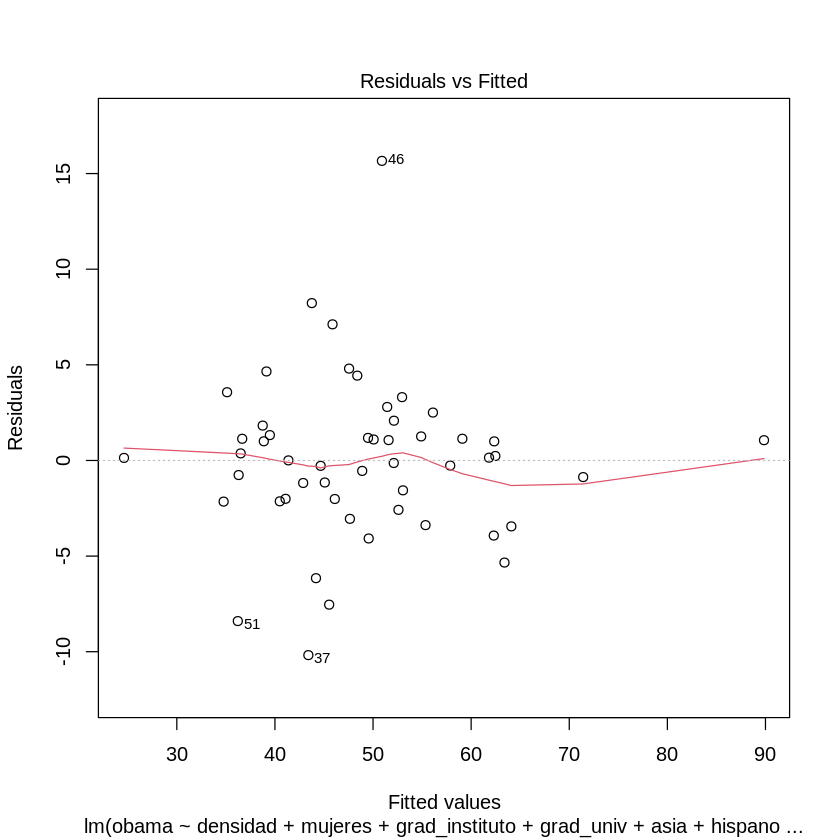

In [ ]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
plot(mod_back, which=1)

**<u>Interpretación resultados</u>.-**  

En la gráfica de **Residuos frente a Valores Ajustados** se observa que los residuos no se dispersan de forma completamente aleatoria alrededor del cero. La presencia de una **curvatura suave en la línea de suavizado (roja)** sugiere la existencia de un **patrón sistemático**, lo que indica que el supuesto de **linealidad** del modelo puede no cumplirse plenamente.

Además, se identifican algunas **observaciones con residuos relativamente grandes** (por ejemplo, los puntos etiquetados), lo que podría indicar la presencia de **valores atípicos** o estados cuyo comportamiento no está bien explicado por el modelo especificado. No obstante, la varianza de los residuos no parece aumentar o disminuir de forma clara con los valores ajustados, por lo que **no se aprecia una heterocedasticidad severa**.

En conjunto, esta gráfica proporciona **evidencia negativa parcial**: aunque el modelo captura una parte importante de la relación entre las variables, la estructura observada en los residuos sugiere que podrían ser necesarias **transformaciones**, la **inclusión de términos no lineales** o la **revisión de variables omitidas** para mejorar el ajuste global del modelo.


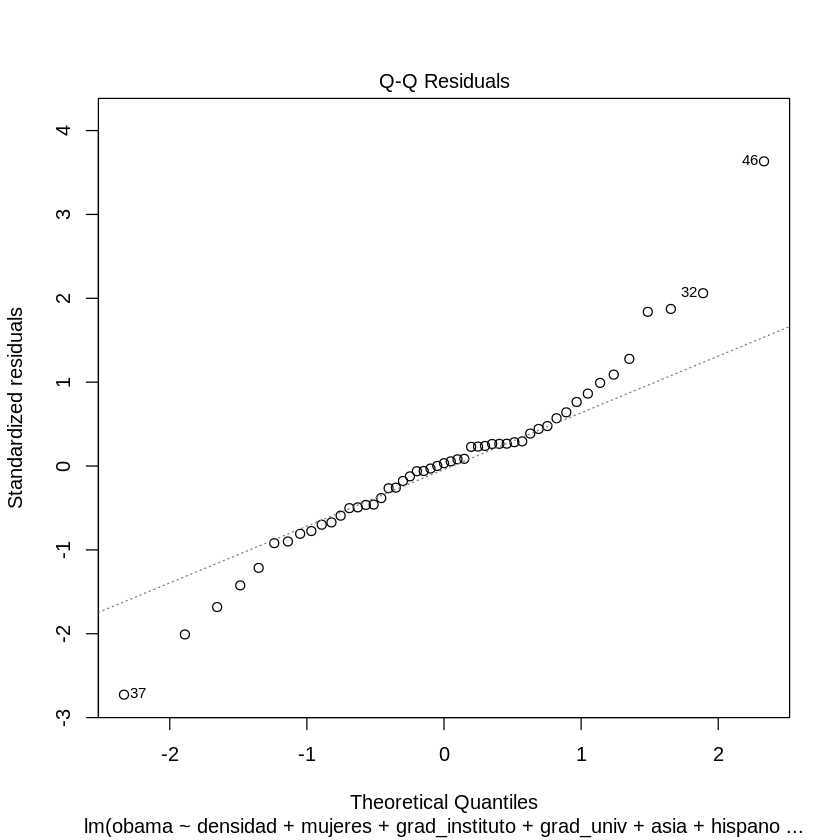

In [ ]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(mod_back, which=2)

**<u>Interpretación resultados</u>.-**  

En la **gráfica Q–Q de los residuos**, utilizada para evaluar el supuesto de **normalidad**, se aprecia que los puntos se alinean razonablemente bien con la recta teórica en la zona central de la distribución. Esto indica que, para valores intermedios, los residuos se comportan de forma aproximadamente normal.

No obstante, en los **extremos de la distribución** se observan desviaciones claras respecto a la diagonal, especialmente en la cola superior, donde algunos residuos positivos se sitúan por encima de la recta teórica, y en la cola inferior, con observaciones más negativas de lo esperado. Esta desviación genera una **curvatura en forma de “S”**, lo que sugiere la presencia de **colas más pesadas que las de una normal** o posibles **valores atípicos**.

En consecuencia, la hipótesis de normalidad de los residuos **no se cumple estrictamente**. Aunque la aproximación normal es razonable en el centro de la distribución, las desviaciones en las colas constituyen **evidencia negativa parcial**, lo que puede afectar a la validez exacta de los contrastes t y F, especialmente en muestras pequeñas. Sin embargo, dado el tamaño muestral moderado, el modelo puede seguir siendo útil desde un punto de vista descriptivo, si bien convendría considerar **transformaciones**, **modelos alternativos** o **métodos robustos**.


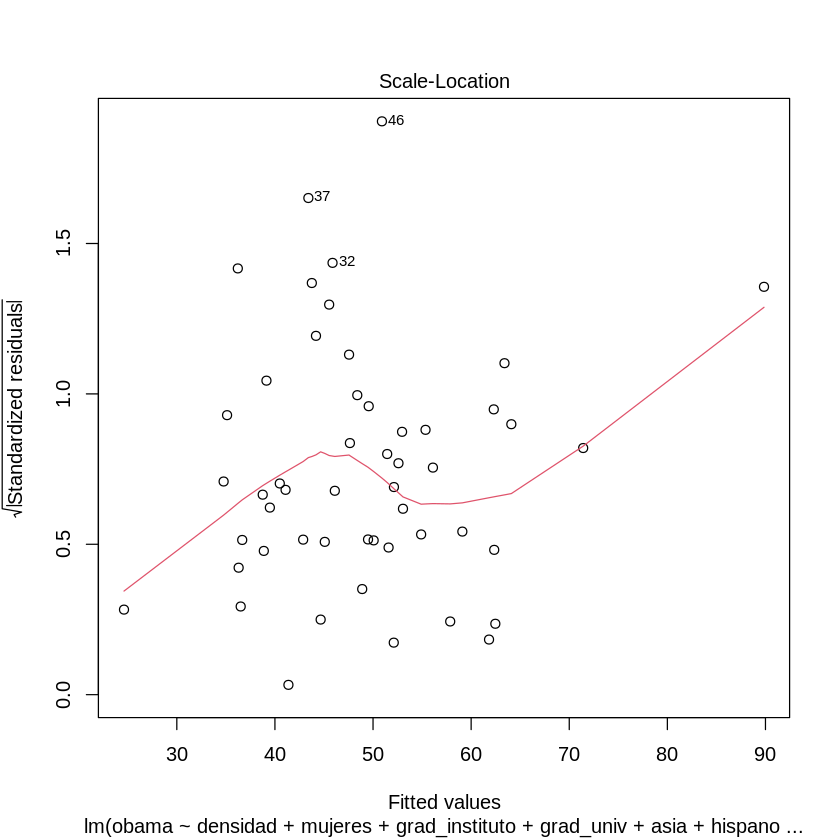

In [ ]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(mod_back, which=3)

**<u>Interpretación resultados</u>.-**  

En la **gráfica Scale–Location**, empleada para evaluar el supuesto de **homocedasticidad**, se representan los valores ajustados del modelo frente a la raíz cuadrada de los residuos estandarizados. Si la varianza de los errores fuese constante, los puntos deberían dispersarse de forma aleatoria alrededor de una banda horizontal, sin un patrón sistemático claro.

Sin embargo, en la figura se observa que la **línea de suavizado en rojo presenta una tendencia creciente**, especialmente para valores ajustados elevados. Además, la dispersión de los puntos aumenta a medida que crecen los valores predichos, lo que indica que la **variabilidad de los residuos no es constante** a lo largo del rango de la variable dependiente.

Este comportamiento constituye una **evidencia negativa clara de homocedasticidad**, sugiriendo la presencia de **heterocedasticidad** en el modelo. Como consecuencia, aunque los estimadores MCO siguen siendo insesgados, los **errores estándar pueden estar mal estimados**, lo que afecta a la fiabilidad de los contrastes de significación. En este contexto, sería recomendable considerar **transformaciones de la variable respuesta**, el uso de **estimadores robustos de la varianza** o modelos alternativos que permitan varianza no constante.


Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


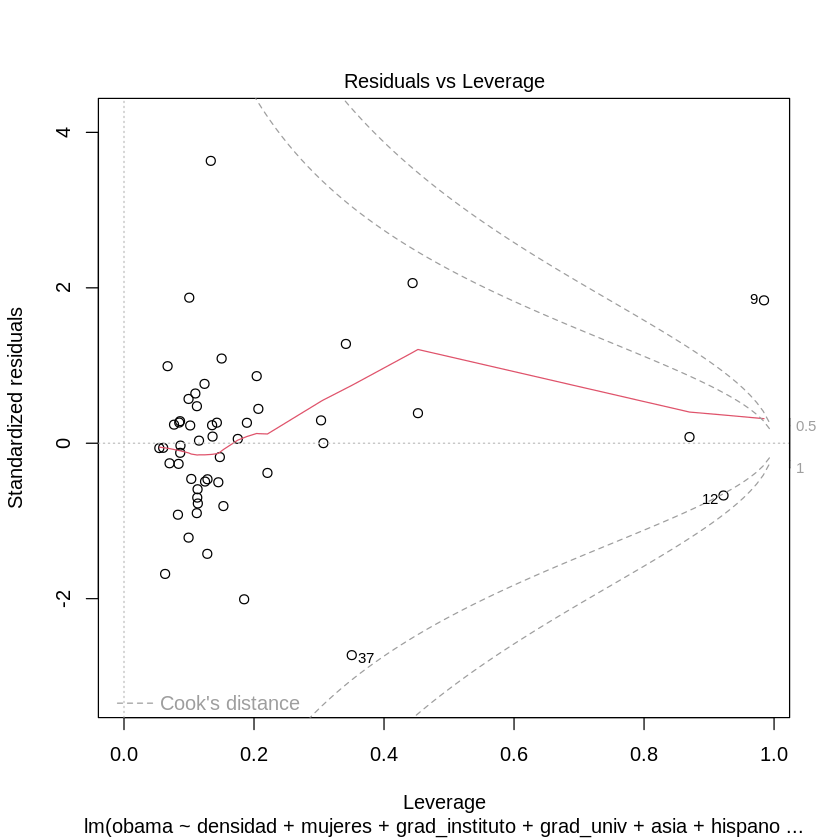

In [ ]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(mod_back, which=5)

**<u>Interpretación resultados</u>.-**  

La **gráfica Residuals vs Leverage** permite evaluar simultáneamente la presencia de **observaciones influyentes**, **valores aberrantes** y **efecto palanca** mediante los residuos estandarizados, el leverage y las curvas de **distancia de Cook**.

En primer lugar, se observa que **la mayoría de las observaciones presentan valores de leverage bajos**, concentrándose en la parte izquierda del gráfico. Esto indica que, en general, los datos no ejercen un efecto palanca elevado sobre el ajuste del modelo, lo cual es un aspecto positivo.

No obstante, aparecen **algunas observaciones con leverage relativamente alto** (situadas hacia la derecha del gráfico), destacando especialmente una o dos observaciones cercanas a los valores máximos de leverage. Aunque estas observaciones no superan de forma clara las líneas críticas más severas de la distancia de Cook, **se sitúan próximas a ellas**, lo que sugiere que podrían tener **influencia moderada** en la estimación de los coeficientes.

En cuanto a los **residuos estandarizados**, se identifican algunos puntos con valores relativamente grandes en valor absoluto, lo que indica la presencia de **posibles observaciones aberrantes**. En particular, destaca una observación con residuo estandarizado negativo elevado, que, combinada con un leverage medio–alto, merece ser analizada con mayor detalle.

En conjunto, la gráfica muestra que:
- No existe una evidencia clara de **efecto palanca extremo**.
- Sí se detectan **algunas observaciones potencialmente influyentes**, cercanas a las curvas de la distancia de Cook.
- Existen **valores aberrantes** que podrían estar afectando localmente al ajuste del modelo.

Por tanto, aunque el modelo no parece estar dominado por unas pocas observaciones, resulta recomendable **analizar individualmente estos puntos influyentes**, evaluar su impacto mediante análisis de sensibilidad (por ejemplo, reestimando el modelo sin ellos) y comprobar si responden a errores de medición o a características estructurales relevantes de los datos.


**<u>Conclusión del análisis gráfico del diagnóstico</u>.-**  

A partir del análisis conjunto de las cuatro gráficas de diagnóstico, se concluye que el modelo presenta **limitaciones relevantes en el cumplimiento de los supuestos clásicos de la regresión lineal**. En primer lugar, la gráfica de **residuos frente a valores ajustados** muestra un **patrón sistemático con forma curvilínea**, lo que indica que la especificación lineal del modelo no logra capturar completamente la relación entre la variable dependiente y las explicativas.  

En segundo lugar, el **gráfico Q–Q** revela que los residuos se ajustan razonablemente a la normalidad en la parte central de la distribución, pero presentan **desviaciones claras en los extremos**, adoptando un **patrón en forma de “S”**, lo que constituye evidencia en contra del supuesto de normalidad.  

La tercera gráfica, correspondiente al **Scale–Location**, pone de manifiesto la presencia de **heterocedasticidad**, ya que la dispersión de los residuos no es constante a lo largo de los valores ajustados, incumpliendo el supuesto de varianza constante.  

Por último, el gráfico de **residuos frente a leverage** muestra la existencia de **observaciones influyentes y valores aberrantes**, que, sin llegar a evidenciar un efecto palanca extremo, podrían estar condicionando de forma desproporcionada la estimación de los coeficientes del modelo.  

En conjunto, aunque el modelo seleccionado resulta ser el **mejor dentro del conjunto de especificaciones comparadas según el criterio AIC**, la evidencia gráfica sugiere que **no satisface plenamente los supuestos de la regresión lineal**. En consecuencia, los resultados deben interpretarse con cautela y sería recomendable considerar **transformaciones de variables, especificaciones alternativas o métodos robustos** para mejorar la validez inferencial del modelo.


Se procederá al estudio numérico del diagnóstico para ello se utilizarán los siguientes test:

- **Test de Shapiro-Wilk (Normalidad de los residuos)**:
se utiliza para contrastar la hipótesis de que los residuos siguen una distribución normal. Este test es especialmente adecuado porque es uno de los más sensibles y recomendados para tamaños de muestra pequeños y medianos como es la base de datos.

- **Test de Breusch-Pagan (Homoscedasticidad de los residuos)**:
permite evaluar la hipótesis de homocedasticidad, es decir, que la varianza de los residuos permanezca constante a lo largo de todos los valores ajustados. La homocedasticidad es necesaria para asegurar que los estimadores obtenidos por mínimos cuadrados ordinarios (MCO) sean eficientes. Este test ha sido elegido porque es una de las pruebas más utilizadas para detectar heterocedasticidad en modelos lineales, complementando la inspección visual de los gráficos de residuos ya realizado.

- **Test de Durbin-Watson (Autocorrelación de los residuos)**: contrasta la independencia de los residuos, en particular si existe autocorrelación de primer orden. La ausencia de autocorrelación es un supuesto esencial para que los estimadores de los coeficientes sean insesgados y eficientes. Se ha seleccionado este test porque ofrece una medida directa y ampliamente aceptada para diagnosticar la autocorrelación.  



In [ ]:
# Normalidad de residuales (Shapiro-Wilk)
shapiro_res <- shapiro.test(residuals(mod_back))
shapiro_res


	Shapiro-Wilk normality test

data:  residuals(mod_back)
W = 0.93536, p-value = 0.008037


Como el p-value es muchísimo menor que 0.05, rechazamos la hipótesis nula de normalidad. Por lo que los residuos no siguen una distribución normal.

In [ ]:
# Heterocedasticidad (Breusch-Pagan)
if(!require(lmtest, quietly = TRUE)){
  install.packages('lmtest', repos='https://cloud.r-project.org')
  library(lmtest)
}
bptest_res <- bptest(mod_back)
bptest_res

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  mod_back
BP = 11.626, df = 9, p-value = 0.2352


El p-value no es menor que 0.05, lo que significa que no rechazamos la hipótesis de homocedasticidad. Los residuos presentan homocedasticidad (varianza  constante).

In [ ]:
# Autocorrelación de residuos (Durbin-Watson)
if(!require(lmtest, quietly = TRUE)){
  install.packages('lmtest', repos='https://cloud.r-project.org')
  library(lmtest)
}

dw_res <- lmtest::dwtest(mod_back)
dw_res



	Durbin-Watson test

data:  mod_back
DW = 2.3429, p-value = 0.8955
alternative hypothesis: true autocorrelation is greater than 0


En este caso, el estadístico obtenido es **DW = 2.3429**, un valor cercano a 2, lo que ya sugiere, de forma descriptiva, la **ausencia de autocorrelación serial**. Además, el **p-valor asociado (0.8955)** es claramente superior a cualquier nivel de significación habitual (1%, 5% o 10%), por lo que **no se rechaza la hipótesis nula**.  

Por tanto, no se encuentra evidencia estadística de autocorrelación positiva en los residuos del modelo. Este resultado constituye una **evidencia favorable**, ya que indica que el supuesto de **independencia de los errores** se cumple razonablemente bien, reforzando la validez del modelo desde el punto de vista de la dependencia temporal de los residuos.

In [ ]:
# Gráfico 5:
# Seleccionamos las 8 variables que nos interesan
# Extraer las variables explicativas utilizadas en el modelo desde el data frame original
xdata <- wdata[, c(
  "densidad",
  "mujeres",
  "grad_instituto",
  "grad_univ",
  "asia",
  "hispanos",
  "evangelicos",
  "mormones",
  "paro"
)]

# Comprobar la estructura del nuevo data frame
str(xdata)


'data.frame':	51 obs. of  9 variables:
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 52.8 51.1 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 87.5 85.8 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 3.5 2.4 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 15 25 ...
 $ mormones      : int  1 4 4 0 2 2 1 0 0 0 ...
 $ paro          : num  8 7.6 8.4 7.6 10.4 7.8 8.3 7.2 9 8.5 ...


In [ ]:
# Obtenemos la matriz de correlación con los coeficientes de correlación de Pearson
cor(xdata)

,densidad,mujeres,grad_instituto,grad_univ,asia,hispanos,evangelicos,mormones,paro
densidad,1.000000000,0.46583195,-0.00383585,0.6372451158,0.01398511,0.005067992,-0.18730620,-0.08036094,0.1985266715
mujeres,0.465831947,1.00000000,-0.39047508,0.2945415320,-0.15143633,-0.099208396,0.06268464,-0.33579558,0.3712009419
grad_instituto,-0.003835850,-0.39047508,1.00000000,0.3931829947,0.06160028,-0.376128189,-0.49656222,0.17862817,-0.5605433382
grad_univ,0.637245116,0.29454153,0.39318299,1.0000000000,0.18051305,0.128221027,-0.55889734,-0.02207835,-0.0003502951
asia,0.013985112,-0.15143633,0.06160028,0.1805130549,1.00000000,0.176863909,-0.11957990,0.02161304,0.0536920213
hispanos,0.005067992,-0.09920840,-0.37612819,0.1282210271,0.17686391,1.000000000,-0.22423503,0.10665199,0.3383900390
evangelicos,-0.187306203,0.06268464,-0.49656222,-0.5588973395,-0.11957990,-0.224235034,1.00000000,-0.22799088,0.1415075705
mormones,-0.080360944,-0.33579558,0.17862817,-0.0220783481,0.02161304,0.106651990,-0.22799088,1.00000000,-0.1214247656
paro,0.198526672,0.37120094,-0.56054334,-0.0003502951,0.05369202,0.338390039,0.14150757,-0.12142477,1.0000000000


**<u>Interpretación de resultados</u>.-**  

La matriz de correlaciones muestra las relaciones lineales entre las variables explicativas incluidas en el modelo y permite evaluar la posible existencia de **multicolinealidad**, es decir, situaciones en las que varias variables aportan información similar, lo que puede afectar a la estabilidad e interpretación de los coeficientes estimados por MCO.

En este caso, se identifican varias correlaciones relevantes:

- **`densidad` y `grad_univ` (0.64):** existe una correlación positiva moderada-alta, lo que sugiere que los estados con mayor densidad de población tienden a presentar un mayor porcentaje de población con estudios universitarios. Esta relación puede introducir cierta redundancia informativa en el modelo.

- **`grad_univ` y `evangelicos` (-0.56):** la correlación negativa relativamente elevada indica que los estados con mayor proporción de población evangélica tienden a presentar menores niveles de estudios universitarios, lo que refleja un patrón sociocultural claro y potencial colinealidad parcial entre ambas variables.

- **`grad_instituto` y `paro` (-0.56):** esta relación negativa sugiere que niveles más altos de graduación en instituto están asociados a menores tasas de paro, lo cual es coherente desde un punto de vista socioeconómico, pero puede generar dependencia lineal entre ambas variables.

- **`grad_instituto` y `evangelicos` (-0.50):** muestra una correlación negativa moderada, indicando nuevamente una relación estructural entre nivel educativo y composición religiosa.

- **`mujeres` y `densidad` (0.47)** y **`mujeres` y `paro` (0.37):** reflejan asociaciones moderadas que podrían estar capturando características demográficas comunes de los estados.

En conjunto, aunque no se observan correlaciones extremas cercanas a ±1, sí existen **correlaciones moderadas-alta** entre algunas variables clave, lo que constituye una **evidencia potencial de multicolinealidad**. Esto implica que los coeficientes individuales deben interpretarse con cautela, ya que cambios en una variable pueden estar parcialmente recogiendo el efecto de otra. En este contexto, el uso previo de procedimientos de selección de variables (como `step`) resulta adecuado para mitigar estos problemas y mejorar la parsimonia del modelo.


**<u>Conclusión final</u>.-**  

El análisis conjunto de la **matriz de correlaciones** y de las **pruebas numéricas de diagnóstico** permite extraer una valoración global del modelo estimado. En primer lugar, la matriz de correlaciones revela la existencia de **relaciones moderadas y, en algunos casos, relativamente elevadas** entre determinadas variables explicativas, especialmente entre variables educativas (`grad_instituto`, `grad_univ`), demográficas (`densidad`, `mujeres`) y religiosas (`evangelicos`, `mormones`). Esta estructura sugiere la presencia de **multicolinealidad**, lo que puede afectar a la estabilidad de los coeficientes y dificultar su interpretación individual, aunque no invalida por sí sola la capacidad predictiva del modelo.

En cuanto a los supuestos clásicos de la regresión lineal, los contrastes numéricos aportan resultados mixtos. El **test de Durbin–Watson** (DW = 2.34, p-valor = 0.8955) no proporciona evidencia de autocorrelación positiva en los residuos, por lo que el supuesto de **independencia** puede considerarse razonablemente satisfecho. De igual forma, el **test de Breusch–Pagan** (p-valor = 0.2352) no rechaza la hipótesis nula de homocedasticidad, indicando que, desde un punto de vista estrictamente numérico, no se detectan problemas significativos de varianza no constante.

Sin embargo, el **test de normalidad de Shapiro–Wilk** (p-valor = 0.0080) rechaza claramente la hipótesis de normalidad de los residuos, lo que confirma la evidencia ya observada en el análisis gráfico. Este incumplimiento, junto con la presencia de observaciones influyentes detectadas previamente y la multicolinealidad entre explicativas, limita la validez inferencial del modelo, especialmente en lo relativo a contrastes de significación y construcción de intervalos de confianza.

En conclusión, aunque el modelo seleccionado es el **mejor dentro del conjunto de alternativas evaluadas** y cumple razonablemente el supuesto de independencia, **no satisface plenamente los supuestos de normalidad y presenta problemas estructurales asociados a multicolinealidad e influencia de observaciones concretas**. Por tanto, los resultados deben interpretarse con cautela y se recomienda considerar **transformaciones de variables, técnicas de regresión robusta o modelos alternativos** que permitan capturar de forma más adecuada la estructura subyacente de los datos.


## Modelos polinómicos con spines y steps 

El archivo de datos **USA.txt**, como sabemos, contiene datos demográficos, sociales y económicos de los $50$ estados de los Estados Unidos más el distrito de Columbia el año que Barack Obama ganó sus segundas elecciones presidenciales. En este caso, queremos explicar la variable `obama` que representa el porcentaje de votos a Obama en esas elecciones para cada estado en función de la variable `mujeres` que representa el porcentaje de mujeres que votaron en cada uno de los estados siendo este un indicador clave de la relevancia del voto femenino en esas elecciones. Se os pide responder a los siguientes apartados.

1. Exploración inicial de la base de datos con las dos variables seleccionadas (incluyendo el análisis de la correlación).
2. Estimar y comparar dos o tres modelos de regresión polinómicos utilizando diferentes grados.
3. Estimar y comparar dos o tres modelos de regresión step functions utilizando diferentes puntos de corte.
4. Estimar y comparar dos o tres modelos de regresión splines polinómicos utilizando diferentes grados y puntos de corte.
5. Evaluar y validar el mejor modelo de regresión no-lineal estimado entre todos los considerados en los apartados anteriores.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [ ]:
df <- read.table("/data/USA.txt", header = TRUE)
df

zdata <- df[, c("obama", "mujeres")]
# Visualizamos la base de datos seleccionada
head(zdata)

,obama,mujeres
,<dbl>,<dbl>
1,38.36,51.5
2,40.81,48.0
3,44.59,50.3
4,36.88,50.9
5,60.24,50.3
6,51.49,49.9


In [ ]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata=na.omit(zdata)
# Podemos comprobar como NO existen datos missing
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 51

[1] 51

como se aprecia no hay datos faltantes

In [ ]:
str(zdata)

'data.frame':	51 obs. of  2 variables:
 $ obama  : num  38.4 40.8 44.6 36.9 60.2 ...
 $ mujeres: num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 52.8 51.1 ...


In [ ]:
# Realizamos el análisis exploratorio de las variables utilizadas
summary(wdata)

     obama          mujeres     
 Min.   :24.75   Min.   :48.00  
 1st Qu.:40.23   1st Qu.:50.35  
 Median :50.67   Median :50.80  
 Mean   :49.03   Mean   :50.70  
 3rd Qu.:56.22   3rd Qu.:51.30  
 Max.   :90.91   Max.   :52.80  

In [ ]:
# Cargar librería necesaria para kurtosis
if(!require(moments, quietly = TRUE)){
  install.packages("moments", repos = "https://cloud.r-project.org")
  library(moments)
}

# Desviación estándar de todas las variables numéricas
sapply(wdata, sd, na.rm = TRUE)

obama    mujeres 
11.8109360  0.7939934

In [ ]:
# Curtosis de todas las variables numéricas
sapply(wdata, kurtosis, na.rm = TRUE)

obama  mujeres 
4.619580 4.810233

**<u>Interpretación resultados</u>.-**

La exploración inicial de la base de datos para las variables `obama` y `mujeres` permite obtener una primera visión del comportamiento del voto a Barack Obama y del peso del voto femenino en los distintos estados.

La variable **`obama`**, que mide el porcentaje de votos obtenidos por Obama, presenta un rango amplio, con valores entre **24.75 %** y **90.91 %**. La media se sitúa en torno al **49.03 %**, mientras que la mediana es ligeramente superior (**50.67 %**), lo que sugiere una ligera asimetría a la izquierda. La desviación estándar (**11.81 puntos porcentuales**) indica una elevada variabilidad entre estados, reflejando diferencias muy marcadas en el apoyo electoral. Además, la curtosis elevada (**4.62**) evidencia una distribución leptocúrtica, con una mayor concentración de observaciones en torno al valor central y colas relativamente pesadas asociadas a estados con comportamientos electorales extremos.

Por su parte, la variable **`mujeres`**, que representa el porcentaje de mujeres que votaron, muestra un comportamiento mucho más estable. Sus valores oscilan entre **48.0 %** y **52.8 %**, con una media de **50.70 %** y una mediana prácticamente coincidente (**50.80 %**), lo que indica una distribución aproximadamente simétrica. La desviación estándar es reducida (**0.79 puntos porcentuales**), lo que sugiere una baja dispersión entre estados. No obstante, la curtosis relativamente alta (**4.81**) indica una fuerte concentración de valores alrededor de la media, con pocos estados alejándose de este patrón general.

En conjunto, el análisis descriptivo pone de manifiesto un **alto grado de heterogeneidad en el apoyo electoral a Obama** frente a una **notable homogeneidad en la participación femenina** entre los distintos estados. Esta diferencia sugiere que, aunque el porcentaje de mujeres votantes varía poco entre estados, el impacto electoral del voto femenino podría manifestarse de forma distinta según el contexto político y social de cada territorio, lo que justifica avanzar hacia un análisis de correlación y modelización posterior.


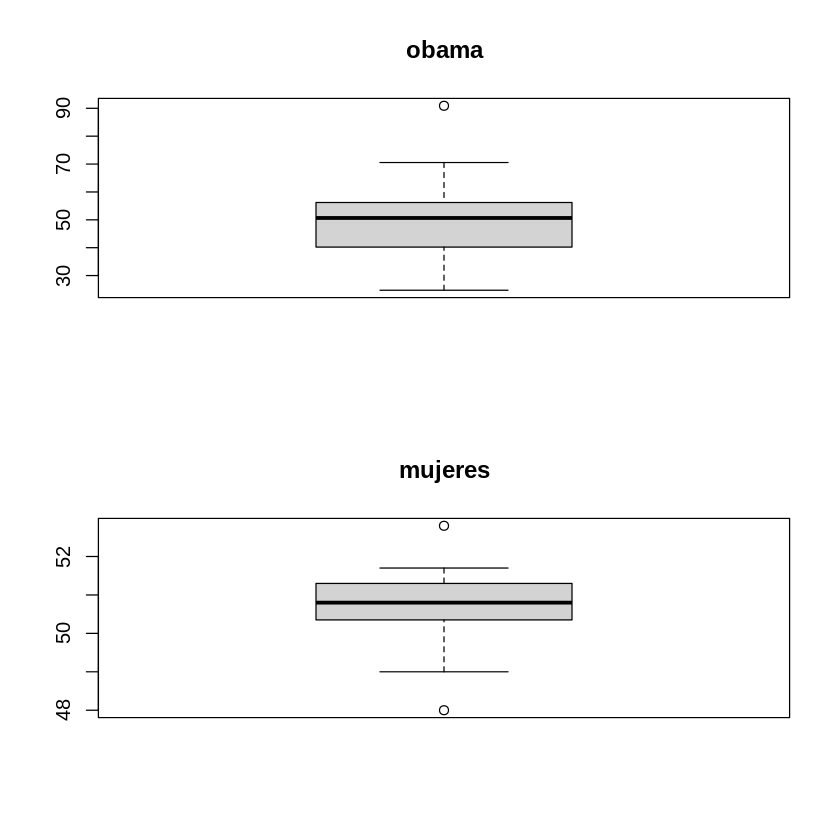

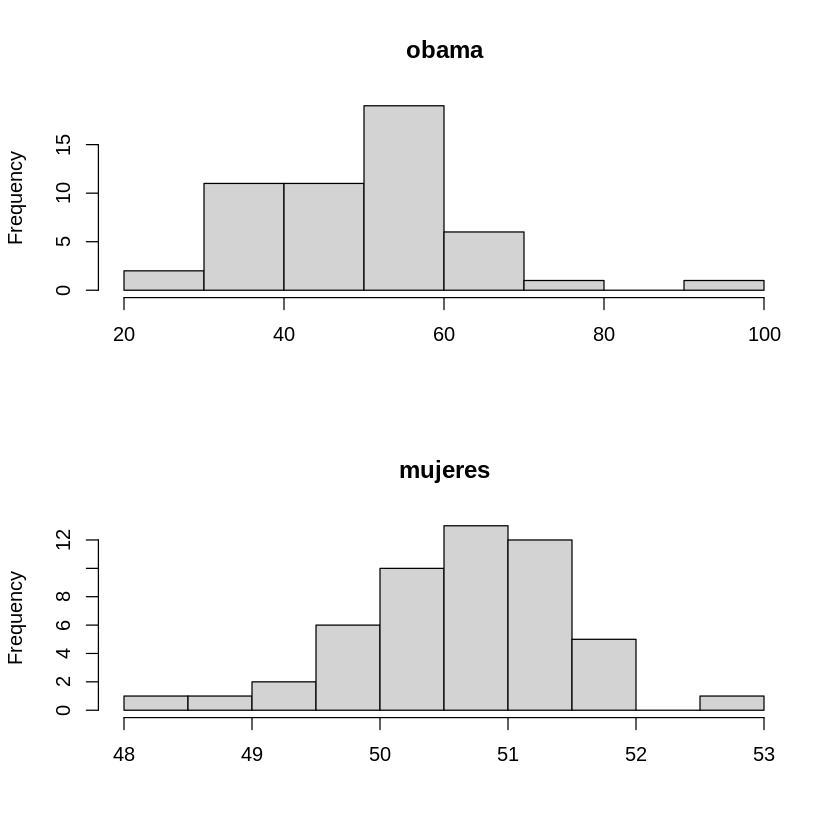

In [ ]:
# Seleccionar solo las variables numéricas
numeric_vars <- wdata[, sapply(wdata, is.numeric)]

# ---------- BOXPLOTS AUTOMÁTICOS ----------
par(mfrow = c(2, ceiling(ncol(numeric_vars)/2)))
for(i in 1:ncol(numeric_vars)){
  boxplot(numeric_vars[, i], main = colnames(numeric_vars)[i])
}

# ---------- HISTOGRAMAS AUTOMÁTICOS ----------
par(mfrow = c(2, ceiling(ncol(numeric_vars)/2)))
for(i in 1:ncol(numeric_vars)){
  hist(numeric_vars[, i], main = colnames(numeric_vars)[i], xlab = "")
}

# Volver a la configuración normal
par(mfrow = c(1,1))


**<u>Interpretación resultados</u>.–**

Los **boxplots** y **histogramas** permiten analizar de forma conjunta la **distribución**, **dispersión** y **forma** de las variables *obama* (porcentaje de votos a Barack Obama) y *mujeres* (porcentaje de mujeres votantes). Este análisis gráfico complementa los estadísticos descriptivos y facilita la identificación de patrones estructurales entre los distintos estados.

**Comparación de dispersión y presencia de valores extremos**

A partir de los **boxplots**, se observa una clara diferencia en la variabilidad de ambas variables:

- **`obama`** presenta una **dispersión moderada-alta**, con un rango amplio y la presencia de **valores atípicos en la parte superior**, correspondientes a estados con apoyos excepcionalmente elevados al candidato. Esto refleja la existencia de bastiones electorales claramente favorables frente a otros estados más competitivos.
- **`mujeres`**, por el contrario, muestra una **dispersión muy reducida**, con la mayoría de las observaciones concentradas en torno a la mediana y apenas algunos valores extremos. Esto indica una notable homogeneidad en la participación femenina entre estados.

**Comparación de la forma de las distribuciones**

Los **histogramas** refuerzan estas observaciones:

- **`obama`** presenta una distribución centrada en valores intermedios, con cierta asimetría y una cola hacia valores altos, coherente con la existencia de estados fuertemente favorables al candidato.
- **`mujeres`** muestra una distribución aproximadamente simétrica y muy concentrada alrededor del 50–51 %, lo que confirma la baja variabilidad observada en el boxplot y la estabilidad del voto femenino a nivel territorial.

**Conclusión**

En conjunto, los gráficos ponen de manifiesto un **marcado contraste estructural** entre ambas variables: mientras que el apoyo electoral a Obama varía sustancialmente entre estados, la participación femenina presenta un comportamiento **muy homogéneo**. Esta diferencia sugiere que, aunque el porcentaje de mujeres votantes apenas cambia entre territorios, su impacto electoral puede depender de otros factores contextuales, lo que justifica avanzar hacia un análisis de correlación y modelización para evaluar su capacidad explicativa sobre el voto a Obama.


Antes de proceder con la estimación del modelo de lineal entre las variables de interés,
es necesario comprobar que existe una relación significativa entre ellas.
Si no se cumple esta condición, no sería adecuado aplicar técnicas de regresión,
ya que el modelo carecería de validez explicativa.  

Para llevar a cabo esta verificación se considerarán tres enfoques complementarios:

1. **Evidencia gráfica**: análisis visual de la relación entre las variables mediante representaciones gráficas.  
2. **Evidencia estadística**: contraste formal de hipótesis que evalúe la existencia y significación de la relación.  
3. **Evidencia numérica**: estudio de indicadores descriptivos que permitan cuantificar la fuerza y dirección de la asociación.  

**Evidencia Gráfica**
El análisis gráfico es una herramienta fundamental para explorar la relación entre las
variables del modelo. En particular, el gráfico de dispersión (scatter plot) permite
visualizar la forma y la intensidad de la relación entre la variable dependiente
y cada una de las variables independientes.

Este tipo de representación facilita la detección de:
- Patrones de asociación (positivos, negativos o nulos).
- Relación lineal o no lineal.
- Posibles outliers.
- Estructuras no esperadas que podrían afectar al ajuste del modelo.

El gráfico de dispersión es especialmente útil para validar visualmente las supo-
siciones iniciales sobre la naturaleza de las relaciones entre las variables.

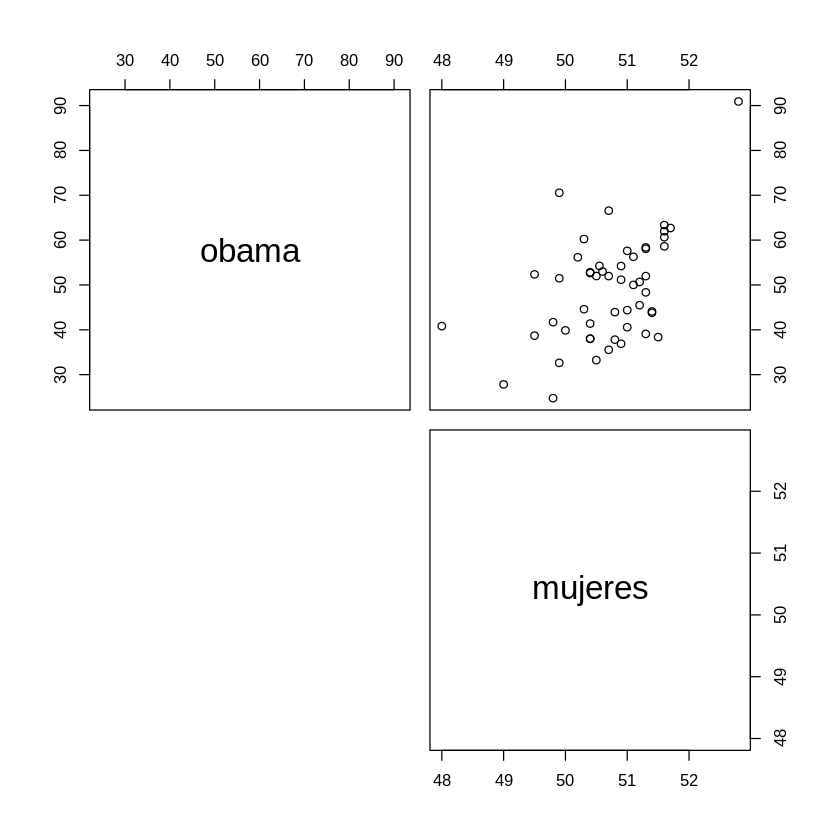

In [ ]:
# Evidencia gráfica a través del gráfico de dispersión
pairs(wdata, lower.panel = NULL)

**<u>Interpretación resultados</u>.-** En el gráfico de dispersión muestra que **los puntos no se distribuyen de manera aleatoria en todo el plano**.
  
Este comportamiento constituye una primera evidencia de que podría existir una relación entre las variables analizadas.  

No obstante, la evidencia gráfica por sí sola no es concluyente;
será necesario complementar este análisis con medidas numéricas y contrastes estadísticos
para confirmar la existencia y la naturaleza de dicha relación.


**Evidencia Numérica**
El **coeficiente de correlación de Pearson** es una medida estadística que permite
cuantificar la fuerza y la dirección de la relación lineal entre dos variables. Este
indicador proporciona una valoración numérica que complementa la evidencia gráfica y
ayuda a confirmar si existe una relación significativa entre las variables analizadas.
El coeficiente de Pearson toma valores en el rango de [−1, 1]:

- Un **valor cercano a 1** indica una **correlación positiva fuerte**, es decir, a medida
que una variable aumenta, la otra también aumenta.

- Un **valor cercano a -1** indica una **correlación negativa fuerte**, es decir, cuando
una variable aumenta, la otra disminuye.

- Un **valor cercano a 0** sugiere una **ausencia de relación lineal significativa** entre
las variables.

El análisis del coeficiente de correlación permite obtener evidencia numérica objetiva
sobre la existencia y la intensidad de las relaciones observadas, apoyando la interpretación
visual obtenida a partir de los gráficos de dispersión.

In [ ]:
# Evidencia numérica
cor(wdata)

,obama,mujeres
obama,1.0000000,0.4939846
mujeres,0.4939846,1.0000000


**<u>Interpretación resultados</u>.-**

El análisis de la **matriz de correlaciones** permite evaluar la relación lineal entre el porcentaje de votos a Barack Obama (`obama`) y el porcentaje de mujeres votantes (`mujeres`) en los distintos estados.

La correlación entre **`obama` y `mujeres` es positiva y de magnitud moderada**, con un coeficiente de **0.494**. Este valor indica que, en general, los estados con una mayor proporción de mujeres votantes tienden a presentar un mayor apoyo electoral a Barack Obama. No obstante, la intensidad de la relación no es suficientemente elevada como para considerarla fuerte.

Desde un punto de vista sustantivo, este resultado sugiere que el **voto femenino desempeña un papel relevante**, pero **no determinante por sí solo**, en la explicación del apoyo electoral al candidato. Es decir, aunque existe una asociación clara y positiva, una parte importante de la variabilidad del voto a Obama debe explicarse a través de otros factores políticos, sociales o demográficos.

En consecuencia, la correlación observada justifica avanzar hacia un **modelo de regresión**, donde el efecto del porcentaje de mujeres pueda evaluarse de forma más precisa, controlando por otras variables explicativas, y permitiendo distinguir entre asociación simple y efecto causal condicionado.


Además de la evidencia gráfica y numérica, es fundamental evaluar la **significancia
estadística** de la relación entre las variables. Para ello, se utiliza el **p-valor**, que indica
la probabilidad de que la correlación observada haya ocurrido por puro azar.

Un p-valor bajo sugiere que es poco probable que la relación observada sea fruto del
azar, mientras que un p-valor alto indica que no se puede descartar que la correlación se deba a la variabilidad aleatoria de los datos.
Por convención:

- Si el **p-valor $<0.05$**, se considera que la relación es **estadísticamente significativa**, es decir, existe suficiente evidencia para afirmar que la correlación entre las variables no es casual.

- Si el **p-valor $≥ 0.05$**, **no se puede concluir** que la relación sea significativa con el
nivel de confianza habitual.

In [ ]:
# Evidencia contrastada (variable crim)
cor.test(wdata$obama, wdata$mujeres)


	Pearson's product-moment correlation

data:  wdata$obama and wdata$mujeres
t = 3.977, df = 49, p-value = 0.0002297
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2528181 0.6773569
sample estimates:
      cor 
0.4939846 


**<u>Interpretación resultados</u>.-**

Se ha realizado un **contraste de correlación de Pearson** para evaluar la existencia y significación estadística de la relación lineal entre el porcentaje de votos a Barack Obama (`obama`) y el porcentaje de mujeres votantes (`mujeres`) en los distintos estados.

El coeficiente de correlación estimado es **positivo y de magnitud moderada** ($r = 0.494$), lo que indica que los estados con una mayor proporción de mujeres votantes tienden, en promedio, a presentar un mayor apoyo electoral a Barack Obama.

El estadístico de contraste obtenido es $t = 3.977$ con **49 grados de libertad**, y el **$p$-valor asociado es 0.00023**, claramente inferior al nivel de significación habitual $\alpha = 0.05$. En consecuencia, se **rechaza la hipótesis nula** de ausencia de correlación poblacional, concluyéndose que existe una **relación lineal estadísticamente significativa** entre ambas variables.

El **intervalo de confianza al 95 %** para el coeficiente de correlación es $[0.253,\; 0.677]$, que no contiene el valor cero y confirma que la asociación es positiva. No obstante, la amplitud del intervalo sugiere que, aunque la relación es clara, su intensidad puede variar desde moderada hasta relativamente elevada.

Desde un punto de vista sustantivo, estos resultados indican que el **voto femenino desempeñó un papel relevante en el apoyo electoral a Obama**, si bien **no explica por sí solo toda la variabilidad observada** en el porcentaje de voto entre estados. Esto justifica avanzar hacia modelos explicativos más completos, donde el efecto del porcentaje de mujeres pueda analizarse conjuntamente con otros factores demográficos, sociales y económicos.


<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

**<u>Modelización polinómica y comparación de resultados</u>.-**  

En este apartado se analiza la posible **relación no lineal** entre el porcentaje de votos a Barack Obama (`obama`) y el porcentaje de mujeres votantes (`mujeres`) en los distintos estados de los Estados Unidos. Aunque el análisis de correlación previo ha puesto de manifiesto la existencia de una **relación lineal positiva y estadísticamente significativa**, resulta pertinente explorar si una especificación no lineal permite capturar mejor la estructura de la relación entre ambas variables.

Para ello, se estiman varios **modelos de regresión polinómica** de distinto orden —lineal, cuadrático, cúbico y de cuarto grado— con el objetivo de evaluar si la inclusión de términos polinómicos en la variable `mujeres` mejora el ajuste del modelo frente a la especificación lineal simple.

Los distintos modelos se comparan utilizando criterios de **bondad de ajuste y parsimonia**, en particular el **coeficiente de determinación ajustado ($R^2$ ajustado)**, el **criterio de información de Akaike (AIC)** y el **criterio de información bayesiano (BIC)**. Estos indicadores permiten valorar de forma conjunta la capacidad explicativa del modelo y la penalización asociada a un mayor número de parámetros.

Finalmente, se representa gráficamente la relación observada entre `obama` y `mujeres` junto con las curvas ajustadas por cada modelo polinómico. Esta comparación visual facilita la identificación de posibles **patrones no lineales**, así como la evaluación de si el aumento de complejidad del modelo se traduce en una mejora sustancial del ajuste o, por el contrario, conduce a un sobreajuste sin ganancia interpretativa relevante.


In [ ]:
# Estimamos el modelo lineal y obtenemos un resumen del mismo
mod_lineal = lm (obama ~ mujeres, data=wdata)
summary(mod_lineal)


Call:
lm(formula = obama ~ mujeres, data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.6263  -8.7165  -0.6763   6.1987  27.4389 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -323.564     93.697  -3.453  0.00115 ** 
mujeres        7.348      1.848   3.977  0.00023 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.37 on 49 degrees of freedom
Multiple R-squared:  0.244,	Adjusted R-squared:  0.2286 
F-statistic: 15.82 on 1 and 49 DF,  p-value: 0.0002297


**<u>Interpretación de resultados</u>.-**  

El `summary()` del modelo de **regresión lineal simple** permite evaluar la relación entre el porcentaje de votos a Barack Obama (`obama`) y el porcentaje de mujeres votantes (`mujeres`) en los distintos estados.

En la columna `Estimate` se presentan los coeficientes estimados del modelo:
- Intercepto: $\hat{\beta}_0 = -323.564$
- Pendiente asociada a `mujeres`: $\hat{\beta}_1 = 7.348$

La interpretación de estos parámetros es la siguiente:

- **Intercepto ($\hat{\beta}_0 = -323.564$):** representa el valor estimado de `obama` cuando el porcentaje de mujeres votantes es cero. Dado que este escenario carece de sentido práctico, el intercepto no tiene una interpretación sustantiva directa, aunque resulta necesario para la correcta especificación del modelo.

- **Porcentaje de mujeres (`mujeres`, $\hat{\beta}_1 = 7.348$):** indica que, **manteniendo el resto de factores constantes**, un incremento de un punto porcentual en la participación femenina se asocia, en promedio, con un **aumento de 7.35 puntos porcentuales en el apoyo electoral a Barack Obama**. Este resultado pone de manifiesto una relación positiva clara entre ambas variables.

La columna `Std. Error` recoge los errores estándar de los estimadores, que permiten construir los estadísticos t. En particular, el estadístico asociado a `mujeres` es **$t = 3.977$**, con un **p-valor de 0.00023**, lo que implica que se **rechaza la hipótesis nula $H_0:\beta_1 = 0$** al nivel de significación habitual del 5 %. Por tanto, el efecto de `mujeres` sobre `obama` es **estadísticamente significativo**.

En cuanto al ajuste del modelo, el **coeficiente de determinación $R^2 = 0.244$** indica que aproximadamente el **24.4 % de la variabilidad del voto a Obama** entre estados se explica únicamente por el porcentaje de mujeres votantes. El **$R^2$ ajustado (0.2286)** confirma que el poder explicativo del modelo es moderado, pero no despreciable para un modelo univariante.

Finalmente, el contraste global de significación del modelo (estadístico **$F = 15.82$**, con **p-valor = 0.0002297**) confirma que el modelo, en su conjunto, es estadísticamente significativo.

En consecuencia, el modelo de regresión lineal simple estimado puede expresarse como:

$$
obama_i = -323.564 \;+\; 7.348 \cdot mujeres_i \;+\; \varepsilon_i,
\quad i = 1,\dots,51
$$

En conjunto, los resultados sugieren que el **voto femenino desempeñó un papel relevante** en el apoyo electoral a Barack Obama en las elecciones analizadas, si bien una parte sustancial de la variabilidad del voto permanece explicada por otros factores no incluidos en este modelo simple.


In [ ]:
# Estimamos el modelo no-lineal polinómico de orden 2 y obtenemos un resumen del mismo
mod_poly2=lm(formula = obama ~ mujeres + I(mujeres^2), data = wdata)
summary(mod_poly2)


Call:
lm(formula = obama ~ mujeres + I(mujeres^2), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.747  -6.826   0.103   6.160  28.565 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  7081.029   3110.407   2.277   0.0273 *
mujeres      -286.296    123.311  -2.322   0.0245 *
I(mujeres^2)    2.910      1.222   2.382   0.0213 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.912 on 48 degrees of freedom
Multiple R-squared:  0.3239,	Adjusted R-squared:  0.2957 
F-statistic:  11.5 on 2 and 48 DF,  p-value: 8.32e-05


**<u>Interpretación de resultados</u>.-**  

El `summary()` del modelo de **regresión polinómica de segundo grado** amplía el modelo lineal simple al incorporar un término cuadrático en la variable `mujeres`, permitiendo analizar una posible **relación no lineal** entre el porcentaje de mujeres votantes y el apoyo electoral a Barack Obama (`obama`).

En la tabla de coeficientes se observa que **todos los parámetros estimados son estadísticamente significativos** al nivel del 5 %. Los estimadores obtenidos son:
\[
\hat{\beta}_0 = 7081.029, \quad
\hat{\beta}_1 = -286.296, \quad
\hat{\beta}_2 = 2.910.
\]

La interpretación de estos coeficientes es la siguiente:

- **Intercepto ($\hat{\beta}_0 = 7081.029$):** representa el valor teórico de `obama` cuando el porcentaje de mujeres votantes es cero. Este escenario carece de sentido práctico, por lo que el intercepto no tiene una interpretación sustantiva directa, aunque es necesario para la correcta formulación del modelo.

- **Término lineal de `mujeres` ($\hat{\beta}_1 = -286.296$):** indica que, para valores bajos de participación femenina, un aumento inicial en el porcentaje de mujeres se asocia con una disminución del apoyo a Obama.

- **Término cuadrático de `mujeres` ($\hat{\beta}_2 = 2.910$):** al ser positivo, introduce curvatura en la relación y compensa el efecto negativo del término lineal. Esto implica que la relación entre `mujeres` y `obama` **no es lineal**, sino que presenta una **forma convexa (en “U”)**.

En términos sustantivos, el modelo sugiere que:
- Para valores bajos o intermedios de participación femenina, el efecto marginal sobre el voto a Obama puede ser reducido o incluso negativo.
- A partir de cierto umbral, incrementos adicionales en el porcentaje de mujeres votantes se asocian con **aumentos crecientes en el apoyo electoral a Obama**.

Desde el punto de vista del ajuste, el modelo alcanza un **$R^2 = 0.3239$** y un **$R^2$ ajustado de 0.2957**, lo que supone una mejora clara respecto al modelo lineal simple (cuyo $R^2$ ajustado era 0.2286). Esto indica que el modelo polinómico explica aproximadamente el **30 % de la variabilidad del voto a Obama**, capturando mejor la estructura de los datos.

El contraste global del modelo (estadístico **$F = 11.5$**, con **p-valor = 8.32 × 10⁻⁵**) confirma que el modelo es **estadísticamente significativo en su conjunto**.

Finalmente, el modelo estimado puede expresarse como:
\[
obama_i = 7081.029 \;-\; 286.296 \cdot mujeres_i \;+\; 2.910 \cdot mujeres_i^2 \;+\; \varepsilon_i,
\quad i = 1,\dots,51.
\]

**En conclusión**, la inclusión del término cuadrático mejora notablemente el ajuste del modelo y pone de manifiesto que la relación entre la participación femenina y el apoyo electoral a Barack Obama presenta un **comportamiento no lineal**, lo que resulta coherente con la complejidad del comportamiento electoral y justifica el uso de especificaciones más flexibles que el modelo lineal simple.


In [ ]:
# Estimamos el modelo no-lineal polinómico de orden 3 y obtenemos un resumen del mismo
mod_poly3=lm(formula = obama ~ mujeres + I(mujeres^2) + I(mujeres^3), data = wdata)
summary(mod_poly3)


Call:
lm(formula = obama ~ mujeres + I(mujeres^2) + I(mujeres^3), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.542  -7.511   0.225   6.470  26.128 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -1.641e+05  9.563e+04  -1.716   0.0927 .
mujeres       9.914e+03  5.697e+03   1.740   0.0883 .
I(mujeres^2) -1.996e+02  1.131e+02  -1.765   0.0840 .
I(mujeres^3)  1.340e+00  7.481e-01   1.791   0.0797 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.691 on 47 degrees of freedom
Multiple R-squared:  0.3671,	Adjusted R-squared:  0.3267 
F-statistic: 9.087 on 3 and 47 DF,  p-value: 7.466e-05


**<u>Interpretación del modelo polinómico de grado 3</u>.-**  

El modelo polinómico de **tercer grado** amplía las especificaciones anteriores al incorporar, además de los términos lineal y cuadrático, un **término cúbico** en la variable `mujeres`. Esta formulación permite capturar relaciones más complejas y cambios en la pendiente del efecto del voto femenino sobre el apoyo electoral a Barack Obama (`obama`).

Los coeficientes estimados son:
$$
\hat{\beta}_0 = -164100, \quad
\hat{\beta}_1 = 9914, \quad
\hat{\beta}_2 = -199.6, \quad
\hat{\beta}_3 = 1.34.
$$

Desde el punto de vista estadístico, **ninguno de los coeficientes resulta significativo al nivel del 5 %**, aunque todos presentan **significación marginal** al 10 % (p-valores entre 0.08 y 0.09). Esto indica que, si bien el modelo sugiere una relación no lineal compleja, la evidencia estadística individual para cada término es débil una vez se incrementa el grado del polinomio.

La interpretación sustantiva de los coeficientes debe realizarse de forma conjunta:
- El **término lineal positivo** sugiere que, en determinados rangos, un aumento en el porcentaje de mujeres votantes se asocia con un mayor apoyo a Obama.
- El **término cuadrático negativo** introduce una curvatura descendente, indicando que dicho efecto no es constante.
- El **término cúbico positivo** permite que la pendiente vuelva a cambiar para valores altos de `mujeres`, generando una relación **no monótona**, con posibles tramos de crecimiento, desaceleración y nuevo crecimiento.

En cuanto al ajuste global, el modelo alcanza un **$R^2 = 0.3671$** y un **$R^2$ ajustado de 0.3267**, lo que supone una mejora respecto al modelo cuadrático (R² ajustado = 0.2957). El **error estándar residual** se reduce ligeramente hasta 9.691, lo que indica una mejora moderada en la capacidad predictiva.

El contraste global del modelo es significativo (**F = 9.087**, p-valor = 7.47 × 10⁻⁵), lo que confirma que el conjunto de términos polinómicos explica una parte relevante de la variabilidad del voto a Obama.

El modelo estimado puede expresarse como:
$$
obama_i = -164100
+ 9914 \cdot mujeres_i
- 199.6 \cdot mujeres_i^2
+ 1.34 \cdot mujeres_i^3
+ \varepsilon_i,
\quad i = 1,\dots,51.
$$

**En conclusión**, el modelo polinómico de grado 3 ofrece una mejora adicional en términos de ajuste respecto al modelo cuadrático, capturando una relación más flexible entre la participación femenina y el apoyo electoral a Obama. Sin embargo, la pérdida de significación individual de los coeficientes y la ganancia relativamente moderada en $R^2$ ajustado sugieren que esta especificación puede estar acercándose a un escenario de **sobreajuste**, por lo que su uso debe valorarse con cautela frente a modelos más parsimoniosos.


<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

**<u>Modelización mediante funciones escalonadas (*Step Functions*)</u>.-**  
En esta sección se aborda la estimación de **modelos de regresión con funciones escalonadas**, una técnica que permite capturar posibles **efectos no lineales o discontinuos** de la variable explicativa `crim` sobre el valor medio de las viviendas (`medv`). A diferencia de los modelos polinómicos, donde la relación se representa mediante una curva continua, las funciones escalonadas dividen el rango de `crim` en intervalos y asignan a cada uno un efecto constante.  

Este enfoque resulta especialmente útil cuando se sospecha que el impacto de `crim` sobre `medv` **cambia bruscamente** a partir de ciertos umbrales, reflejando posibles saltos en el valor de las viviendas en zonas con diferentes niveles de criminalidad.  

Para el análisis se proponen distintos escenarios:  
1. Un primer modelo con **tres intervalos automáticos**, generados de forma equidistante.  
2. Un segundo modelo con **puntos de corte definidos manualmente**, según valores de `crim` específicos.   

De esta manera, se podrá evaluar si la relación entre ambas variables presenta discontinuidades relevantes y cuál de las configuraciones ofrece el mejor ajuste según los criterios estadísticos habituales.


In [ ]:
# Estimamos el modelo de regresión step functions con puntos de corte sin concretar (Escenario 1)
modelo_step_fun1 = lm(obama ~ cut(mujeres, 3), data = wdata)
summary(modelo_step_fun1)


Call:
lm(formula = obama ~ cut(mujeres, 3), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.483  -9.223   0.890   6.426  36.134 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  39.920      5.597   7.133 4.61e-09 ***
cut(mujeres, 3)(49.6,51.2]    7.313      5.947   1.230   0.2248    
cut(mujeres, 3)(51.2,52.8]   14.856      6.258   2.374   0.0216 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.19 on 48 degrees of freedom
Multiple R-squared:  0.1377,	Adjusted R-squared:  0.1018 
F-statistic: 3.832 on 2 and 48 DF,  p-value: 0.02856


**<u>Interpretación de resultados (modelo Step Functions – Escenario 1)</u>.-**  

El modelo *step function* divide la variable `mujeres` en **tres intervalos** y estima el apoyo electoral a Barack Obama (`obama`) como constante dentro de cada tramo, permitiendo analizar posibles **cambios discretos** en el nivel medio del voto femenino.

El **intercepto** (\(\hat{\beta}_0 = 39.92\)) representa el **porcentaje medio estimado de voto a Obama** en el **primer intervalo** de `mujeres` (el intervalo inferior), que actúa como **categoría de referencia**.

Los coeficientes asociados a los intervalos superiores miden la **diferencia media** en el apoyo a Obama respecto a dicho grupo base:
- Para el **segundo intervalo** \((49.6, 51.2]\), el apoyo a Obama aumenta en **7.31 puntos porcentuales** respecto al primer grupo. No obstante, este efecto **no es estadísticamente significativo** (p-valor = 0.2248), lo que sugiere que la diferencia observada podría deberse al azar.
- En el **tercer intervalo** \((51.2, 52.8]\), el apoyo a Obama se incrementa en **14.86 puntos porcentuales**, siendo este efecto **estadísticamente significativo al 5 %** (p-valor = 0.0216). Esto indica que, para niveles altos de participación femenina, el respaldo a Obama es sustancialmente mayor que en el grupo de referencia.

En términos de ajuste, el modelo presenta un **\(R^2 = 0.1377\)** y un **\(R^2\) ajustado de 0.1018**, lo que implica que aproximadamente un **10 % de la variabilidad** en el voto a Obama es explicada por esta segmentación de la variable `mujeres`. Aunque la capacidad explicativa es moderada, el **contraste global es significativo** (F = 3.832; p-valor = 0.0286), validando la relevancia conjunta de los intervalos definidos.

**En conclusión**, el modelo *step function* revela que el apoyo a Obama **aumenta de forma discreta** a medida que se pasa a intervalos más altos de participación femenina, siendo especialmente notable y estadísticamente significativo en el tramo superior. Este resultado sugiere la existencia de un **efecto umbral**: solo a partir de ciertos niveles de presencia femenina el incremento en el voto a Obama se vuelve claramente apreciable, algo que no se capta adecuadamente con modelos puramente lineales.


In [ ]:
# Mostrar únicamente los 3 intervalos creados por cut(crim, 3)
levels(modelo_step_fun1$model$`cut(mujeres, 3)`)


[1] "(48,49.6]"   "(49.6,51.2]" "(51.2,52.8]"

In [ ]:
min(wdata$mujeres)
max(wdata$mujeres)

[1] 48

[1] 52.8

No se debe permitir que el algoritmo determine puntos de corte de forma aleatoria, ya que puede generar intervalos fuera del rango de la variable independiente. En este caso, el valor mínimo de $wdata\$mujeres$ es $48$, que es elegido por el algoritmo.
Pero puede darse el caso de que el algoritmo ha reportado un intervalo inferior al minimo ademas del valor máximo. Este tipo de errores ocurre ocasionalmente y constituye una limitación de la función utilizada. Por ello, se ha verificado que los intervalos definidos se encuentren dentro del rango real de la variable. Se opta por establecer manualmente los puntos de corte, utilizando los valores propuestos por el algoritmo anterior, pero ajustando el límite inferior al valor mínimo observado, asegurando así que los grupos no sean equidistantes entre sí.

In [ ]:
# Modelo step functions con puntos de corte no equidistantes (Escenario 2)
modelo_step_fun2 <- lm(
  obama ~ cut(mujeres, c(48, 50, 52.8)),
  data = wdata
)

summary(modelo_step_fun2)



Call:
lm(formula = obama ~ cut(mujeres, c(48, 50, 52.8)), data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.493  -8.741   0.192   7.222  40.187 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                              42.206      3.840  10.991 1.05e-14 ***
cut(mujeres, c(48, 50, 52.8))(50,52.8]    8.518      4.241   2.009   0.0502 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.52 on 48 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.07753,	Adjusted R-squared:  0.05831 
F-statistic: 4.034 on 1 and 48 DF,  p-value: 0.05023


**<u>Interpretación de resultados (modelo Step Functions – Escenario 2)</u>.-**  

En este segundo escenario se estima un modelo *step function* en el que la variable `mujeres` (porcentaje de mujeres votantes) se divide en **intervalos no equidistantes**, definidos mediante puntos de corte específicos \((48,\;50,\;52.8]\), con el objetivo de analizar si el apoyo electoral a Barack Obama (`obama`) presenta **cambios discretos** entre distintos niveles de participación femenina.

El **intercepto** (\(\hat{\beta}_0 = 42.206\)) representa el **porcentaje medio estimado de voto a Obama** en el **grupo de referencia**, correspondiente a los estados con menor porcentaje de mujeres votantes (primer intervalo). Este grupo actúa como categoría base frente a la cual se comparan los restantes niveles de `mujeres`.

El coeficiente asociado al intervalo superior \((50,\,52.8]\) es **positivo** (\(\hat{\beta}_1 = 8.518\)) y **marginalmente significativo** (p-valor = 0.0502). Este resultado indica que, en los estados con un porcentaje de mujeres votantes más elevado, el apoyo medio a Obama es aproximadamente **8.5 puntos porcentuales superior** al observado en el grupo de referencia. Aunque la significación estadística es débil (al 10 %, pero no claramente al 5 %), la dirección del efecto es coherente con la evidencia previa de una relación positiva entre la participación femenina y el voto a Obama.

En términos de ajuste, el modelo presenta un **\(R^2 = 0.0775\)** y un **\(R^2\) ajustado de 0.0583**, lo que indica que la segmentación de `mujeres` explica alrededor del **6–8 % de la variabilidad** del voto a Obama. Si bien la capacidad explicativa es limitada, el **contraste global del modelo es marginalmente significativo** (F = 4.034; p-valor = 0.0502), sugiriendo que la clasificación por intervalos de participación femenina aporta información relevante.

**En conclusión**, el modelo *step function* sugiere la existencia de un **salto positivo en el apoyo a Obama** cuando el porcentaje de mujeres votantes supera determinados umbrales, reforzando la idea de que el voto femenino desempeñó un papel relevante en las elecciones analizadas. No obstante, la evidencia estadística es moderada, lo que aconseja complementar este enfoque con modelos más flexibles, como splines, en los apartados siguientes.


<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

En este apartado se procede a **estimar y comparar modelos de regresión mediante *splines* polinómicos** con el objetivo de capturar posibles **patrones no lineales locales** en la relación entre el apoyo electoral a Barack Obama (`obama`) y el porcentaje de mujeres (`mujeres`). A diferencia de los polinomios globales, los *splines* permiten una mayor flexibilidad al ajustar polinomios de bajo grado en distintos intervalos de la variable explicativa, conectados de forma suave en determinados **puntos de corte (*knots*)**. Se consideran distintas especificaciones variando tanto el **grado del polinomio** como el **número y la ubicación de los *knots***, y los modelos resultantes se comparan atendiendo a criterios de **bondad de ajuste y parsimonia**, como el \(R^2\) ajustado y los criterios de información. Este enfoque permite evaluar si una modelización más flexible mejora la descripción de la relación entre ambas variables sin incurrir en sobreajuste.


In [ ]:
# Cargamos el paquete necesario
library(splines)

# Estimamos el modelo de regresión spline polinómico
# con 3 knots NO equidistribuidos (Escenario 1)
mod_spline1 <- lm(
  obama ~ bs(mujeres, knots = c(48, 50, 52.8), degree = 3),
  data = wdata
)

summary(mod_spline1)




Call:
lm(formula = obama ~ bs(mujeres, knots = c(48, 50, 52.8), degree = 3), 
    data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6716  -7.4899   0.4179   6.5710  26.1739 

Coefficients: (2 not defined because of singularities)
                                                  Estimate Std. Error t value
(Intercept)                                         93.184      9.434   9.877
bs(mujeres, knots = c(48, 50, 52.8), degree = 3)1  -53.129     13.363  -3.976
bs(mujeres, knots = c(48, 50, 52.8), degree = 3)2  -68.217     17.764  -3.840
bs(mujeres, knots = c(48, 50, 52.8), degree = 3)3  -31.847     14.451  -2.204
bs(mujeres, knots = c(48, 50, 52.8), degree = 3)4  -53.453     15.453  -3.459
bs(mujeres, knots = c(48, 50, 52.8), degree = 3)5       NA         NA      NA
bs(mujeres, knots = c(48, 50, 52.8), degree = 3)6       NA         NA      NA
                                                  Pr(>|t|)    
(Intercept)                                       6.02e-

**<u>Interpretación de resultados (modelo spline cúbico – Escenario 1)</u>.-**

En este escenario se ha estimado un **modelo de regresión spline cúbico** para analizar la posible **relación no lineal** entre el apoyo electoral a Barack Obama (`obama`) y el porcentaje de mujeres (`mujeres`), utilizando **tres puntos de corte no equidistantes** situados en los valores 48, 50 y 52.8. El uso de splines permite una especificación más flexible que los modelos polinómicos globales, ya que la pendiente de la relación puede variar entre tramos manteniendo continuidad y suavidad en los *knots*.

El modelo presenta un **\(R^2 = 0.3963\)** y un **\(R^2\) ajustado de 0.3438**, lo que supone una **mejora clara respecto a los modelos lineales, polinómicos y step functions** estimados previamente. Esto indica que el spline cúbico es capaz de capturar una parte sustancial de la variabilidad en el apoyo a Obama asociada a cambios en la proporción de mujeres. Asimismo, el **contraste global F** (F = 7.55; p-valor = 9.2·10⁻⁵) confirma que el modelo es **estadísticamente significativo en su conjunto**.

En la tabla de coeficientes se observa que **varias funciones base del spline son estadísticamente significativas** (p-valores < 0.05), lo que indica que existen **cambios relevantes en la pendiente de la relación** entre `mujeres` y `obama` a lo largo del rango de la variable explicativa. No obstante, debe señalarse que **dos coeficientes aparecen como NA**, lo que R indica explícitamente como *“not defined because of singularities”*.

Estos valores NA **no implican un modelo nulo ni invalida el ajuste**, sino que se deben a **colinealidad perfecta entre algunas de las funciones base generadas por `bs()`**, dado el número de *knots*, el grado del spline y el tamaño muestral disponible. En estas situaciones, el sistema de mínimos cuadrados no tiene una solución única y R elimina automáticamente las columnas redundantes del diseño, manteniendo únicamente las necesarias para identificar el modelo.

En términos sustantivos, el modelo spline cúbico sugiere que la relación entre el porcentaje de mujeres y el apoyo a Obama **no es estrictamente lineal**, sino que presenta **tramos con distinta intensidad del efecto**, especialmente alrededor de los puntos de corte definidos. Esta flexibilidad adicional explica el mejor ajuste observado frente a especificaciones más simples.

**En conclusión**, el modelo spline cúbico con *knots* no equidistantes proporciona la representación más flexible y con mayor capacidad explicativa hasta el momento, permitiendo capturar adecuadamente las variaciones no lineales en la relación entre `mujeres` y `obama`, aunque a costa de una interpretación menos directa de los coeficientes individuales.


 El otro modelo se hará con $bs(x, df=6, knots=sin determinar, degree=3)$  como no se determinan los knots  la función los calculará de la siguiente manera $knots = df - degree$ en este caso sería $3 = 6 - 3$
El no. de knots = 3 (sin determinarlos nosotros pero equidistribuidos)
- Los grados de libertad = 6 (parámetros estimados)
- Los grados del polinomio son degree = 3 (polinomio cúbico)

In [ ]:
# Estimamos el modelo de regresión spline polinómico con 3 knots equidistribuidos (Escenario 2)
mod_spline2 = lm(obama ~ bs(mujeres, df=6, degree=3), data = wdata)
summary(mod_spline2)


Call:
lm(formula = obama ~ bs(mujeres, df = 6, degree = 3), data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.9697  -6.8039   0.9001   5.1754  25.5563 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        40.231      9.554   4.211 0.000124 ***
bs(mujeres, df = 6, degree = 3)1  -23.257     24.007  -0.969 0.337957    
bs(mujeres, df = 6, degree = 3)2   12.270     14.387   0.853 0.398356    
bs(mujeres, df = 6, degree = 3)3    7.102     11.003   0.645 0.521956    
bs(mujeres, df = 6, degree = 3)4    4.502     15.601   0.289 0.774284    
bs(mujeres, df = 6, degree = 3)5   58.054     35.716   1.625 0.111219    
bs(mujeres, df = 6, degree = 3)6   50.769     13.533   3.752 0.000511 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.586 on 44 degrees of freedom
Multiple R-squared:  0.4203,	Adjusted R-squared:  0.3413 
F-statistic: 5.318 on 6 and 44 D

In [ ]:
# Obtenemos los puntos de corte elegidos según criterio equitativo
attr(bs(wdata$mujeres, df = 6, degree = 3), "knots")

[1] 50.35 50.80 51.30

**<u>Interpretación de resultados (modelo spline cúbico – Escenario 2)</u>.-**

En este segundo escenario se ha estimado un **modelo de regresión spline cúbico** para analizar la posible **relación no lineal** entre el porcentaje de mujeres que votaron (`mujeres`) y el apoyo electoral a Barack Obama (`obama`), fijando **6 grados de libertad**. A diferencia del escenario anterior, los **puntos de corte (*knots*) se seleccionan automáticamente** siguiendo un **criterio equitativo**, es decir, distribuidos según cuantiles de la variable explicativa, lo que permite una adaptación flexible y equilibrada a lo largo de todo su rango.

El modelo alcanza un **\(R^2 = 0.4203\)** y un **\(R^2\) ajustado de 0.3413**, lo que supone una **mejora sustancial respecto a los modelos lineales, polinómicos y step functions**, y un ajuste comparable al spline del Escenario 1. El **contraste global F** (F = 5.318; p-valor = 0.00034) confirma que el modelo es **estadísticamente significativo en su conjunto**, validando la existencia de una relación no lineal entre `mujeres` y `obama`.

El **intercepto** (\(\hat{\beta}_0 = 40.23\)) puede interpretarse como el nivel base del apoyo a Obama cuando el efecto de las funciones spline se encuentra en su referencia. Los coeficientes asociados a las **funciones base del spline** (`bs(mujeres, df = 6, degree = 3)`) no se interpretan individualmente de forma directa, sino conjuntamente como deformaciones locales de la curva ajustada. En este caso, destaca que **una de las funciones base es claramente significativa** (p-valor = 0.0005), lo que indica que existen **tramos del rango de `mujeres` donde el efecto sobre el voto a Obama es especialmente relevante**.

Los **knots seleccionados automáticamente** se sitúan aproximadamente en:
\[
50.3,\; 50.8,\; 51.3
\]
lo que sugiere que los **cambios más relevantes en la pendiente** de la relación se concentran en torno a valores **intermedios del porcentaje de mujeres**, más que en los extremos. Esto indica que **pequeñas variaciones en la participación femenina alrededor de esos niveles pueden asociarse a cambios apreciables en el apoyo electoral a Obama**, mientras que en otros tramos el efecto es más suave.

El **error estándar residual** (9.59) es ligeramente inferior al de modelos más simples, reforzando la idea de un mejor ajuste sin incurrir en sobreajuste excesivo. No obstante, el hecho de que no todas las funciones base sean significativas individualmente sugiere que la **no linealidad está localizada en zonas concretas del dominio**, y no repartida uniformemente.

**En conclusión**, el spline cúbico con 6 grados de libertad y *knots* equitativos proporciona una **representación flexible y bien ajustada** de la relación entre `mujeres` y `obama`, capturando **efectos locales no lineales** que los modelos globales no detectan. Este enfoque resulta especialmente útil cuando se sospecha que el impacto del voto femenino sobre el resultado electoral **no es constante**, sino que varía según el nivel de participación femenina en cada estado.


<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

In [ ]:
# Calculamos los criterios de selección para todos los modelos estimados

# 1. Coeficiente de determinación ajustado
R2_mejor <- c(
  summary(mod_lineal)$adj.r.squared,
  summary(mod_poly2)$adj.r.squared,
  summary(mod_poly3)$adj.r.squared,
  summary(modelo_step_fun1)$adj.r.squared,
  summary(modelo_step_fun2)$adj.r.squared,
  summary(mod_spline1)$adj.r.squared,
  summary(mod_spline2)$adj.r.squared
)

# 2. RMSE
RMSE <- c(
  sqrt(mean(residuals(mod_lineal)^2)),
  sqrt(mean(residuals(mod_poly2)^2)),
  sqrt(mean(residuals(mod_poly3)^2)),
  sqrt(mean(residuals(modelo_step_fun1)^2, na.rm = TRUE)),
  sqrt(mean(residuals(modelo_step_fun2)^2, na.rm = TRUE)),
  sqrt(mean(residuals(mod_spline1)^2)),
  sqrt(mean(residuals(mod_spline2)^2))
)

# 3. Criterio de Información de Akaike (AIC)
AIC_mejor <- c(
  extractAIC(mod_lineal)[2],
  extractAIC(mod_poly2)[2],
  extractAIC(mod_poly3)[2],
  extractAIC(modelo_step_fun1)[2],
  extractAIC(modelo_step_fun2)[2],
  extractAIC(mod_spline1)[2],
  extractAIC(mod_spline2)[2]
)

# 4. Criterio de Información Bayesiano (BIC)
BIC_mejor <- c(
  extractAIC(mod_lineal, k = log(nrow(wdata)))[2],
  extractAIC(mod_poly2, k = log(nrow(wdata)))[2],
  extractAIC(mod_poly3, k = log(nrow(wdata)))[2],
  extractAIC(modelo_step_fun1, k = log(nrow(wdata)))[2],
  extractAIC(modelo_step_fun2, k = log(nrow(wdata)))[2],
  extractAIC(mod_spline1, k = log(nrow(wdata)))[2],
  extractAIC(mod_spline2, k = log(nrow(wdata)))[2]
)

# 5. Tabla comparativa final
Medidas_mejor <- data.frame(
  Coef.R2adj = R2_mejor,
  RMSE = RMSE,
  AIC = AIC_mejor,
  BIC = BIC_mejor,
  row.names = c(
    "mod_lineal",
    "mod_poly2",
    "mod_poly3",
    "modelo_step_fun1",
    "modelo_step_fun2",
    "mod_spline1",
    "mod_spline2"
  )
)

# Mostramos la tabla
knitr::kable(Medidas_mejor, digits = 4)




|                 | Coef.R2adj|    RMSE|      AIC|      BIC|
|:----------------|----------:|-------:|--------:|--------:|
|mod_lineal       |     0.2286| 10.1681| 240.5639| 244.4275|
|mod_poly2        |     0.2957|  9.6158| 236.8678| 242.6633|
|mod_poly3        |     0.3267|  9.3036| 235.5008| 243.2281|
|modelo_step_fun1 |     0.0583| 11.2877| 246.3717| 250.2353|
|modelo_step_fun2 |     0.0583| 11.2877| 246.3717| 250.2353|
|mod_spline1      |     0.3438|  9.0863| 235.0905| 244.7496|
|mod_spline2      |     0.3413|  8.9036| 237.0190| 250.5418|

**<u>Interpretación resultados</u>.-**  

La comparación entre los distintos modelos pone de manifiesto diferencias claras en términos de **capacidad explicativa**, **calidad de ajuste** y **complejidad**.

En primer lugar, el **modelo lineal** presenta el peor desempeño global entre los modelos continuos, con un \(R^2\) ajustado de **0.2286** y un RMSE elevado (**10.17**), lo que confirma que la relación entre las variables no puede describirse adecuadamente mediante una forma estrictamente lineal.

Los **modelos polinómicos** mejoran progresivamente el ajuste al aumentar el grado. El modelo cuadrático ($\text{mod_poly2}$) incrementa el \(R^2\) ajustado hasta **0.2957**, mientras que el cúbico ($\text{mod_poly3}$) alcanza **0.3267**, con una reducción clara del RMSE. No obstante, este aumento de flexibilidad viene acompañado de una penalización en BIC, indicando un posible riesgo de sobreajuste.

Los **modelos step functions** $(\text{modelo_step_fun1}$ y $\text{modelo_step_fun2}$) muestran un desempeño claramente inferior, con un \(R^2\) ajustado muy bajo (**0.0583**) y el RMSE más alto de todos los modelos. Esto sugiere que la discretización en tramos introduce pérdidas importantes de información y no captura adecuadamente la estructura subyacente de la relación.

Los **modelos spline** son los que ofrecen el mejor compromiso entre flexibilidad y ajuste. El modelo $\text{mod_spline1}$ presenta el **mayor \(R^2\) ajustado (0.3438)** y el **menor AIC (235.09)**, lo que lo posiciona como el modelo con mejor capacidad explicativa penalizada por complejidad. Por su parte, \(\text{mod_spline2}\) logra el **menor RMSE (8.90)**, indicando el mejor ajuste predictivo puro, aunque a costa de un BIC considerablemente más alto, reflejo de una mayor complejidad.

En conjunto:
- **Si el criterio principal es la capacidad explicativa y parsimonia**, el modelo **spline con knots fijados ($\text{mod_spline1}$)** es el más adecuado.
- **Si el objetivo es minimizar el error de predicción**, el **spline con grados de libertad prefijados ($\text{mod_spline2}$)** resulta preferible.
- Los **modelos step** quedan descartados por su bajo rendimiento, y los **polinómicos** ofrecen una mejora intermedia pero inferior a los splines.

Estos resultados refuerzan la conveniencia de utilizar **splines** cuando se sospecha una relación no lineal suave entre las variables.

Estos resultados ponen de manifiesto que la **relación entre el porcentaje de mujeres y el porcentaje de voto a Obama (`obama`) no es lineal**. Los modelos lineales y por tramos (*step functions*) presentan un ajuste claramente inferior, lo que sugiere que el efecto de la variable `mujeres` sobre el apoyo electoral a Obama **no puede describirse adecuadamente mediante una pendiente constante** a lo largo de todo su rango.

En particular, los **modelos spline cúbicos** permiten capturar **variaciones locales en la relación**, reflejando que el impacto del porcentaje de mujeres cambia según el nivel considerado. Esto indica que **incrementos similares en la proporción de mujeres no generan el mismo efecto electoral** en todos los contextos: en determinados intervalos el apoyo a Obama aumenta de forma más acusada, mientras que en otros el efecto se atenúa o incluso se estabiliza.

La mejora observada en términos de \(R^2\) ajustado, RMSE y criterios de información confirma que la **flexibilidad del spline** resulta clave para describir esta relación compleja. Desde un punto de vista sustantivo, estos resultados sugieren que el comportamiento electoral femenino **no responde de manera homogénea**, sino que depende del contexto demográfico específico, lo que justifica el uso de modelos no lineales para un análisis más realista y preciso del patrón de


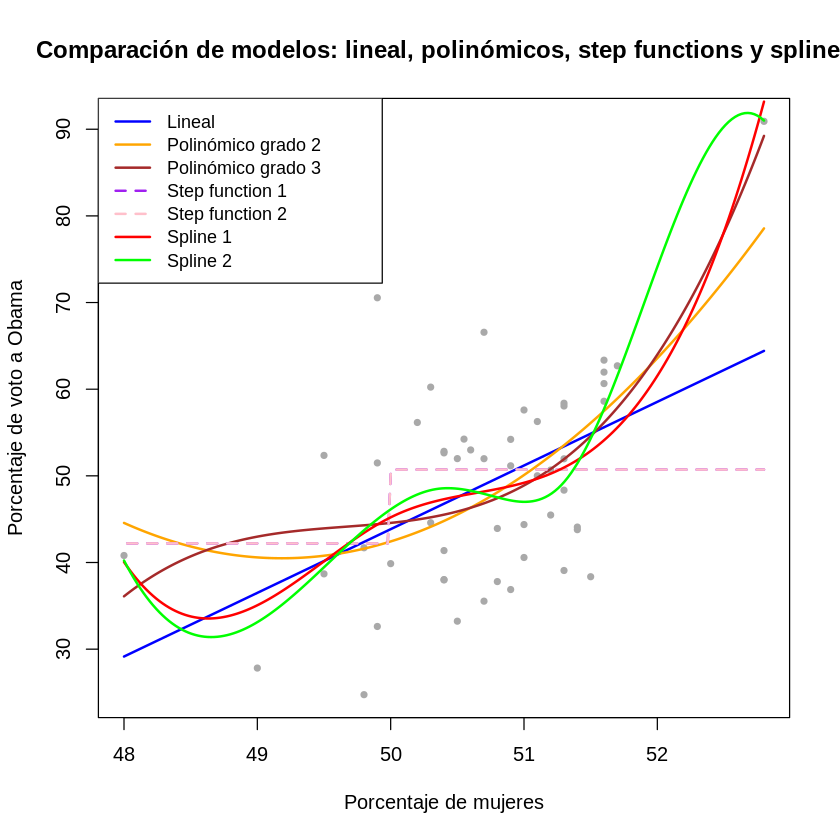

In [ ]:
# Interpolación dentro del rango de la variable independiente (mujeres)
limites <- range(wdata$mujeres)
nuevos_puntos <- seq(from = limites[1], to = limites[2], length.out = 200)
nuevos_puntos <- data.frame(mujeres = nuevos_puntos)

# Predicciones de todos los modelos
pred_lineal       <- predict(mod_lineal, newdata = nuevos_puntos)
pred_poly2        <- predict(mod_poly2, newdata = nuevos_puntos)
pred_poly3        <- predict(mod_poly3, newdata = nuevos_puntos)
pred_step1        <- predict(modelo_step_fun1, newdata = nuevos_puntos)
pred_step2        <- predict(modelo_step_fun2, newdata = nuevos_puntos)
pred_spline1      <- predict(mod_spline1, newdata = nuevos_puntos)
pred_spline2      <- predict(mod_spline2, newdata = nuevos_puntos)

# Representación gráfica conjunta
plot(
  x = wdata$mujeres, y = wdata$obama,
  pch = 20, col = "darkgrey",
  xlab = "Porcentaje de mujeres",
  ylab = "Porcentaje de voto a Obama",
  main = "Comparación de modelos: lineal, polinómicos, step functions y splines"
)

lines(nuevos_puntos$mujeres, pred_lineal,  col = "blue",   lwd = 2)
lines(nuevos_puntos$mujeres, pred_poly2,   col = "orange", lwd = 2)
lines(nuevos_puntos$mujeres, pred_poly3,   col = "brown",  lwd = 2)
lines(nuevos_puntos$mujeres, pred_step1,   col = "purple", lwd = 2, lty = 2)
lines(nuevos_puntos$mujeres, pred_step2,   col = "pink",   lwd = 2, lty = 2)
lines(nuevos_puntos$mujeres, pred_spline1, col = "red",    lwd = 2)
lines(nuevos_puntos$mujeres, pred_spline2, col = "green",  lwd = 2)

legend(
  "topleft",
  legend = c(
    "Lineal",
    "Polinómico grado 2",
    "Polinómico grado 3",
    "Step function 1",
    "Step function 2",
    "Spline 1",
    "Spline 2"
  ),
  col = c("blue", "orange", "brown", "purple", "pink", "red", "green"),
  lwd = 2,
  lty = c(1, 1, 1, 2, 2, 1, 1),
  cex = 0.9
)


**<u>Interpretación de resultados</u>.-**  
En la figura se comparan los ajustes obtenidos mediante distintos modelos de regresión —**lineal**, **polinómicos**, **step functions** y **splines cúbicos**— para analizar la relación entre el **porcentaje de mujeres** y el **porcentaje de voto a Obama**. El modelo lineal impone una relación estrictamente monótona y suave, según la cual el apoyo electoral a Obama aumenta de forma uniforme a medida que crece la proporción de mujeres, lo que resulta una simplificación excesiva del patrón observado.

Los modelos **polinómicos** introducen curvatura global y permiten cierta flexibilidad adicional, aunque pueden forzar el ajuste en los extremos del rango. Los modelos **step function** capturan cambios discretos en el nivel medio del voto a Obama al segmentar la variable `mujeres` en intervalos, pero sacrifican continuidad y suavidad en la relación.

Los **splines cúbicos** proporcionan el ajuste más informativo desde el punto de vista gráfico y estadístico, al permitir que el efecto del porcentaje de mujeres sobre el voto a Obama **varíe de forma flexible a lo largo del rango**, manteniendo continuidad. En particular, se aprecia que para valores bajos y medios de `mujeres` el incremento del apoyo es moderado, mientras que a partir de ciertos umbrales (en torno al 50–51%) el efecto se **intensifica notablemente**, reflejando un aumento más acusado del voto a Obama.

En conjunto, la evidencia gráfica y cuantitativa confirma que **la relación entre el porcentaje de mujeres y el voto a Obama no es lineal**, y que los **modelos spline capturan mejor las variaciones locales del efecto**, ofreciendo una representación más realista del comportamiento electoral.
